## Capstone Project - The Battle of the Neighborhoods (Week 2) : 
# Discover the pattern of city and neighborhood(s) which has high density of Starbucks in US
### Applied Data Science Capstone by IBM/Coursera

## 0_Table of contents
* [1 Introduction](#1_Introduction)
* [2 Data](#2_Data)
* [3_Methodology](#3_Methodology)
* [4_Analysis](#4_Analysis)
* [5_Result_&_Discussion](#5_Result_&_Discussion)
* [6_Conclusion](#6_Conclusion)

---
## 1_Introduction
Can we deduce how Starbucks choose their target city or neighborhood? Can we spot the pattern behind their existing store locations?

In the United States (US), fast-food becomes one of the cuisine cultures, and start growing globally since last century. McDonald, KFC, Starbucks, Burger King and others make one feels no different when situated at any cities. Starts firstly as wagon located just beside highway, fast-food culture already intruding in majority urban neighborhoods. Therefore, location becomes the most crucial strategy to open one fast-food store. 

This study is aimed to discover the pattern of **city and neighborhood** which has high popularity of fast-food chain, specifically, **Starbucks**. The pattern study includes the **demographic, economical, even Point Of interest (POI)** for this time. Target of audience will be any fast-food entrepreneurs. The discovered pattern might help them to justify the popularity of one location before open a new store nearby.

---
## 2_Data
Based on the stated problem, involded factors including:
- Existing Starbucks stores data in US cities
- City data in US city
- Neighborhood data in targeted city that has high density of Starbucks
- Venues data in chosen neighborhood.

### 2.1 Existing Starbucks stores data in US cities (2017)
First, we will collect the existing Starbucks store data in US, the data will help us to narrow down to one target city. 
Please note that **city** here similar to the concepts of **place**, in which population ranging from 10,000 to over 1,000,000. 

_The United States Census Bureau defines a **place** as a concentration of population which has a name, is locally recognized, and is not part of any other place. A place typically has a residential nucleus and a closely spaced street pattern, and it frequently includes commercial property and other urban land uses. A place may be an incorporated place (a self-governing city, town, or village) or it may be a census-designated place (CDP). -- WIKIPEDIA_

For example, New York City has 5 boroughs (Manhattan, Brooklyn, Staten Island, The Bronx and Queens), and we will study these places respectively, rather than view them as a whole.<br>
- https://www.kaggle.com/starbucks/store-locations

In [1]:
# DATA IMPORT
    # For Local
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import requests
starbuck_data = pd.read_csv(r'C:\Users\ASUS\Downloads\starbucks-store-locations\starbucks_location.csv')

    # OR for Github
# import pandas as pd 
# import io
# starbucks_url="https://raw.githubusercontent.com/jackieyong/learning_coursera_datascience/master/09_applied_datascience_capstone/week4/data/starbucks_location.csv"
# starbuck_req=requests.get(starbucks_url).content
# starbuck_data=pd.read_csv(io.StringIO(starbuck_req.decode('utf-8')))

# DATA CLEANING
starbuck_data = starbuck_data.query('Country == "US"')
starbuck_data_drop_columns = ['Brand', 'Store Name', 'Store Number', 'Ownership Type','Phone Number','Timezone','Store Number']
starbuck_data.drop(starbuck_data_drop_columns, inplace=True, axis=1)
starbuck_data.columns = ['address', 'city','state_ab','country','postcode','long','lat']
starbuck_data.city = starbuck_data.city.astype(str).str.lower()
starbuck_data['city'] = starbuck_data['city'].str.replace(r".","")
starbuck_data['city'] = starbuck_data['city'].str.replace(r",","")
starbuck_data['city'] = starbuck_data['city'].str.replace(r"-"," ")
starbuck_data['city'] = starbuck_data['city'].str.replace(r"'","")
starbuck_data['city'] = starbuck_data['city'].str.replace("saint ","st ")
starbuck_data['city'] = starbuck_data['city'].str.replace("fort ","ft ")
starbuck_data['city'] = starbuck_data['city'].str.replace("mount ","mt ")

starbuck_data.reset_index(inplace=True, drop=True)
starbuck_data

address              city  \
0                                   5600 Debarr Rd Ste 9         anchorage   
1                                         1725 Abbott Rd         anchorage   
2                                        1501 Huffman Rd         anchorage   
3      320 W. 100th Ave, 100, Southgate Shopping Ctr ...         anchorage   
4                                     1005 E Dimond Blvd         anchorage   
5                            1000 E Northern Lights Blvd         anchorage   
6                                     3101 PENLAND PKWY.         anchorage   
7                HMSHost, 500 West International Airport         anchorage   
8                                     110 W. Tudor Rd, E         anchorage   
9                                       7701 Debarr Road         anchorage   
10                           7731 E Northern Lights Blvd         anchorage   
11                                      2300 Abbott Road         anchorage   
12                            1200 N Muldoon Rd, Suite F         anchorage   
13                                    2000 W Dimond Blvd         anchorage   
14                         2421 East Tudor Road, Suite 8         anchorage   
15                             Bldg 5800 Westover Avenue         anchorage   
16            4000 W Dimond Blvd, Anchorage Fifth Avenue         anchorage   
17                            320 West 5th Avenue, #D50A         anchorage   
18                               150 W 100th Ave Suite A         anchorage   
19                            5000 West International Rd         anchorage   
20                                5000 W Intl Airport Rd         anchorage   
21                           1650 W Northern Lights Blvd         anchorage   
22     1142 N. Muldoon Road, 110, Anchorage 5th Ave Mall         anchorage   
23                              320 West 5th Avenue, 224         anchorage   
24                                   11409 Business Blvd       eagle river   
25                              16707 Coronado Road, 100       eagle river   
26                                   13401 Old Glenn Hwy       eagle river   
27                               3627 Airport Way (405R)         fairbanks   
28                                         30 College Rd         fairbanks   
29                                      3755 Airport Way         fairbanks   
...                                                  ...               ...   
13578                                    1000 Oakvale Rd         princeton   
13579                                   Milepost 18 I-77         princeton   
13580                                      1 Snowshoe Dr          snowshoe   
13581                              4605 MacCorkle Ave SW  south charleston   
13582                                      300 Cabela Dr      valley grove   
13583                                  100 St. Thomas Dr           weirton   
13584                             200 Mount Dechantel Rd          wheeling   
13585                                560 N Center Street            casper   
13586                                  4585 East 2nd St.            casper   
13587                                 300 E Wyoming Blvd            casper   
13588                                        4003 Cy Ave            casper   
13589                               3702 Dell Range Blvd          cheyenne   
13590                                  700 S Greeley Hwy          cheyenne   
13591                             3355 E. Pershing Blvd.          cheyenne   
13592                               5800 Yellowstone Rd.          cheyenne   
13593                                 5930Yellowstone Rd          cheyenne   
13594           2111 Central Ave, Dell Range Marketplace          cheyenne   
13595                 3610 Dell Range Boulevard, Unit A6          cheyenne   
13596                                       1825 17th St              cody   
13597                               2610 S. Douglas Hwy.          gille

In [2]:
total_store = starbuck_data.shape[0]
print('It is discovered that there are',total_store, 'Starbucks stores in US (2017).')

It is discovered that there are 13608 Starbucks stores in US (2017).


In [3]:
# GROUP DATA BY CITY
starbuck_group = starbuck_data.groupby(['city','state_ab']).size().reset_index(name='store_count')
starbuck_group = starbuck_group.sort_values('store_count', ascending=True)
starbuck_group.reset_index(inplace=True, drop=True)
starbuck_group['store_count'] = starbuck_group['store_count'].astype(float)
starbuck_group

city state_ab  store_count
0             aberdeen       NC          1.0
1              matawan       NJ          1.0
2            mattituck       NY          1.0
3               maumee       OH          1.0
4             maumelle       AR          1.0
5         mays landing       NJ          1.0
6          mcchord afb       WA          1.0
7         mashantucket       CT          1.0
8              mchenry       IL          1.0
9               mebane       NC          1.0
10               mecca       CA          1.0
11        mechaicsburg       PA          1.0
12            medfield       MA          1.0
13             medford       NJ          1.0
14               media       PA          1.0
15       mckinleyville       CA          1.0
16              medina       MN          1.0
17          marysville       MI          1.0
18        martinsville       IN          1.0
19           mansfield       CT          1.0
20        marble falls       TX          1.0
21          marblehead       MA          1.0
22        marco island       FL          1.0
23             margate       FL          1.0
24        margate city       NJ          1.0
25          marysville       CA          1.0
26              marion       IA          1.0
27             marrero       LA          1.0
28            marshall       MI          1.0
29        marshalltown       IA          1.0
...                ...      ...          ...
3537          honolulu       HI         42.0
3538  colorado springs       CO         42.0
3539             tampa       FL         42.0
3540        pittsburgh       PA         43.0
3541          columbus       OH         45.0
3542           orlando       FL         47.0
3543      philadelphia       PA         47.0
3544      indianapolis       IN         56.0
3545             miami       FL         57.0
3546            tucson       AZ         59.0
3547            austin       TX         60.0
3548            boston       MA         60.0
3549         charlotte       NC         60.0
3550           atlanta       GA         63.0
3551        sacramento       CA         66.0
3552            denver       CO         79.0
3553       san antonio       TX         82.0
3554          san jose       CA         85.0
3555        washington       DC         87.0
3556            dallas       TX         89.0
3557     san francisco       CA         90.0
3558           phoenix       AZ        105.0
3559          portland       OR        110.0
3560       los angeles       CA        128.0
3561         san diego       CA        138.0
3562           houston       TX        154.0
3563           seattle       WA        156.0
3564         las vegas       NV        157.0
3565           chicago       IL        182.0
3566         manhattan       NY        233.0

[3567 rows x 3 columns]

In [4]:
total_city_set = starbuck_group.shape[0]
print('After groupby, there are',total_city_set, 'cities that has at least one Starbucks in US.')

After groupby, there are 3567 cities that has at least one Starbucks in US.


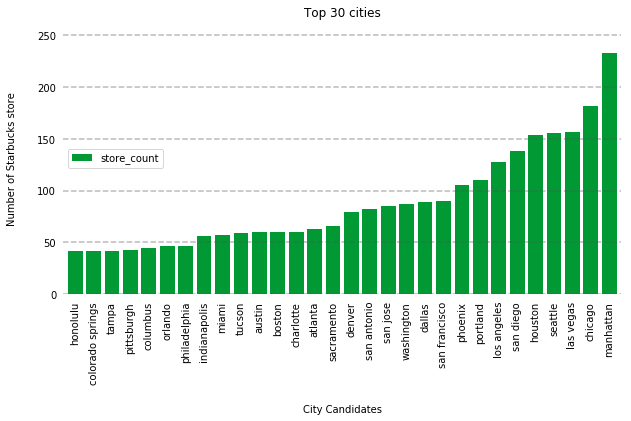

In [5]:
# PLOT BARCHART
    # Data for plot
starbuck_city_plot = starbuck_group.tail(30)
starbuck_city_plot.reset_index(inplace=True, drop=True)

    # Plot
import matplotlib.pyplot as plt
ax = starbuck_city_plot.plot(kind='bar', x='city', y='store_count', figsize=(10, 5), color='#009933', width=0.8)
ax.set_title('Top 30 cities')
    # Disable spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
    # Switch off ticks
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
    # Set x-axis label
ax.set_xlabel("City Candidates", labelpad=20)
    # Set y-axis label
ax.set_ylabel("Number of Starbucks store", labelpad=20)
    # Draw vertical axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#555555', zorder=1)
plt.show() 

**Manhattan** is the city (place) that has the highest popularity of Starbucks, in which it has already reaches **233** stores itself. The following cities includes Chicago, Las Vegas, Seattle and Houston. PS: The first Starbucks was born in Seattle.

In [6]:
# DATA VISUALIZATION, ONLY SHOW TOP 1500 CITIES
import folium
import pandas as pd

starbuck_group_geo = starbuck_data.groupby(['city','state_ab']).agg({'long': 'median', 'lat': 'median'})
starbuck_group_geo.reset_index(inplace=True, drop=False)
star_city_geo = pd.merge(starbuck_group, starbuck_group_geo, how='left', on=['city', 'state_ab'])
star_city_geo = star_city_geo.tail(1500)
m = folium.Map(
    location=[48, -110],
    tiles='cartodbpositron',
    zoom_start=3,
    height=500,
)

for i in range(0,len(star_city_geo)):
   folium.Circle(
       location=[star_city_geo['lat'].iloc[i], star_city_geo['long'].iloc[i]],
       popup=star_city_geo['city'].iloc[i],
       radius=star_city_geo['store_count'].iloc[i]*2000,
       color=False,
       fill=True,
       fill_color='#009933', fill_opacity=0.5,
   ).add_to(m)
m

From choropleth map, it can be easily discovered that Starbucks' store density is accumulated around **east and west coast**, such as **New York, Houston, San Diego, Los Angeles, San Franciso, San Jose, Seattle and Portland**. Several inland cities such as **Chicago, Las Vegas and Phoenix** also has relatively high density of Starbucks.

### 2.2 City data in US (2017)
City data (all level population) is collected, features include: city, state, population, gender, age median, marriage conditions, mortgage, high school education, household income and family income.
- https://www.kaggle.com/goldenoakresearch/us-acs-mortgage-equity-loans-rent-statistics
- https://www.kaggle.com/washimahmed/usa-latlong-for-state-abbreviations

In [7]:
# DATA IMPORT 
    # For Local
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
us_city2 = pd.read_csv(r'C:\Users\ASUS\Downloads\us-acs-mortgage-equity-loans-rent-statistics\real_estate_db_utf8.csv')

# DATA CLEANING
# duplicate_check =us_city2[us_city2.duplicated(['UID'], keep = False)]
us_city2.drop_duplicates(subset='UID', keep='first', inplace=True)
us_city2.reset_index(drop=True)
    # Check null
null_columns=us_city2.columns[us_city2.isnull().any()]
# us_city2[null_columns].isnull().sum()
us_city2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
    # Drop unwanted columns
us_city2_column_names_original = list(us_city2.columns.values)
drop_key = ['mean', 'sample','stdev','cdf']
us_city2_column_names_drop_contain=[]
us_city2_column_names_drop_contain = [s for s in us_city2_column_names_original if any(xs in s for xs in drop_key)]
us_city2_column_names_drop_all = us_city2_column_names_drop_contain + ['UID','place','type','zip_code','lat','lng','SUMLEVEL','COUNTYID','STATEID',
                                                                   'state','primary','area_code','pct_own','married_snp']
us_city2.drop(us_city2_column_names_drop_all, inplace=True, axis=1)

us_city2['city'] = us_city2['city'].astype(str).str.lower()
us_city2['city'] = us_city2['city'].str.replace(r"–"," ")
us_city2['city'] = us_city2['city'].str.replace(r".","")
us_city2['city'] = us_city2['city'].str.replace(r"-"," ")
us_city2['city'] = us_city2['city'].str.replace(r",","")
us_city2['city'] = us_city2['city'].str.replace(r"'","")
us_city2['city'] = us_city2['city'].str.replace("saint ","st ")
us_city2['city'] = us_city2['city'].str.replace("fort ","ft ")
us_city2['city'] = us_city2['city'].str.replace("mount ","mt ")

male_pop_ratio = us_city2['male_pop'].div(us_city2['pop']).to_frame('male_pop_ratio')
female_pop_ratio = us_city2['female_pop'].div(us_city2['pop']).to_frame('female_pop_ratio')
us_city2 = pd.concat([us_city2, male_pop_ratio, female_pop_ratio], axis=1)

us_city2_a = us_city2.iloc[:,0:7]
us_city2_a.columns = ['state_ab', 'city','land_area','water_area','population','male_population','female_population']
us_city2_a = us_city2_a.groupby(['state_ab','city']).sum()
population_density = us_city2_a['population'].div(us_city2_a['land_area']).to_frame('population_density')
us_city2_a = pd.concat([us_city2_a, population_density], axis=1)

us_city2_b = us_city2.copy()
us_city2_b.drop(['ALand','AWater','pop','male_pop','female_pop'], inplace=True, axis=1)
us_city2_b = us_city2_b.groupby(['state_ab','city']).median()
us_city2_b

us_city2_merge = pd.merge(us_city2_a, us_city2_b, how='left', on=['state_ab', 'city'])
us_city2_merge

land_area   water_area  population  \
state_ab city                                                    
AK       anchorage       1.102774e+09  493687174    150561       
         copper center   6.395523e+10  1214891934   2554         
         craig           3.358007e+08  84392388     2513         
         delta junction  1.729676e+10  376371361    4794         
         dillingham      4.096520e+08  7194810      2335         
         eagle river     5.092349e+08  1859309      3727         
         egegik          6.073599e+10  24532276414  1474         
         eielson afb     1.160772e+09  4608603      2727         
         fairbanks       1.107154e+10  84662407     59503        
         ft yukon        1.040000e+11  1939826489   1218         
         haines          6.012620e+09  1051287034   2626         
         healy           3.301595e+10  66068782     2060         
         hoonah          1.696277e+10  7798365244   2062         
         houston         5.705677e+07  3015466      1977         
         jber            4.514154e+08  192718122    4532         
         juneau          6.848156e+09  1422171690   20429        
         kasilof         4.206761e+08  1087029240   10112        
         kenai           7.405135e+07  139942927    7463         
         ketchikan       1.257611e+10  4648192104   10677        
         klawock         1.243895e+10  14217671166  2139         
         kodiak          8.436824e+07  20307304     4368         
         larsen bay      1.686471e+10  14145351190  1885         
         moose pass      4.422859e+09  257016265    1167         
         naknek          1.304962e+09  993834934    970          
         nikiski         2.281878e+09  1901792639   5863         
         ninilchik       1.982657e+10  10062394495  400          
         nome            1.908739e+09  562656735    3971         
         north pole      1.527730e+08  2211465      16505        
         palmer          4.756626e+08  3900859      17450        
         port graham     2.498760e+09  4721134884   1007         
...                               ...      ...        ...        
WY       diamondville    6.356217e+09  42586752     5409         
         douglas         3.695368e+07  597117       3113         
         dubois          3.517256e+09  25399737     1714         
         encampment      4.851640e+09  14971574     3523         
         gillette        5.936005e+09  6699390      21183        
         green river     9.039272e+07  1170215      8396         
         greybull        2.315626e+09  2836767      3602         
         hanna           6.906899e+09  75207124     1397         
         hulett          5.203149e+09  27816347     4537         
         jackson         7.781997e+07  845971       7986         
         lance creek     6.801350e+09  4969450      2516         
         lander          5.266600e+07  0            7636         
         laramie         6.802900e+08  10167664     20133        
         lovell          1.867381e+09  39018845     5678         
         manderson       3.940477e+09  14572675     2615         
         midwest         2.892053e+09  7969064      6087         
         mountain view   2.953930e+09  5101790      6629         
         newcastle       1.108001e+08  183772       3710         
         pavillion       1.743131e+09  92440870     4089         
         powell          1.729017e+09  3330295      5147         
         rawlins         8.696024e+09  81823833     10819        
         riverton        1.265208e+09  13148974     16367        
         rock river      1.037255e+10  78979109     2003         
         rock springs    3.035781e+08  60033        22729        
         sheridan        1.061939e+07  11045        9549         
         torrington      8.794984e+07  927985       5571         
         upton           6.100270e+09  4817928      3442         
         wheatland       2.289550e+09  61606458     2254         
  

In [8]:
# DATA INTEGRATION
    # Merge Data from 2.1 and 2.2

star_us_city = pd.merge(us_city2_merge, starbuck_group, how='left', on=['state_ab', 'city'])

star_us_city.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
star_us_city.reset_index(inplace=True, drop=True)
star_us_city

state_ab              city     land_area  water_area  population  \
0     AK       anchorage         1.102774e+09  493687174   150561       
1     AK       eagle river       5.092349e+08  1859309     3727         
2     AK       fairbanks         1.107154e+10  84662407    59503        
3     AK       juneau            6.848156e+09  1422171690  20429        
4     AK       ketchikan         1.257611e+10  4648192104  10677        
5     AK       kodiak            8.436824e+07  20307304    4368         
6     AK       north pole        1.527730e+08  2211465     16505        
7     AK       palmer            4.756626e+08  3900859     17450        
8     AK       soldotna          6.243345e+07  3599530     6610         
9     AK       wasilla           4.463144e+08  86148942    42361        
10    AL       alabaster         5.696130e+07  796184      16032        
11    AL       athens            4.245059e+08  26678288    38264        
12    AL       auburn            4.159423e+08  2559465     38030        
13    AL       bessemer          1.675782e+08  6590032     24219        
14    AL       birmingham        3.255505e+08  7734912     133518       
15    AL       cullman           6.794599e+08  16270231    45163        
16    AL       daphne            2.648176e+07  4121297     13056        
17    AL       decatur           1.237016e+08  5094207     41865        
18    AL       dothan            8.082558e+07  168730      40552        
19    AL       florence          3.274654e+08  32112367    24189        
20    AL       foley             2.552653e+08  12578657    28029        
21    AL       gadsden           8.012372e+07  8030315     21557        
22    AL       gardendale        3.051819e+07  20405       9587         
23    AL       gulf shores       3.414632e+07  8917573     3600         
24    AL       homewood          2.247712e+07  136477      26088        
25    AL       hoover            6.651335e+07  1393365     47501        
26    AL       huntsville        3.348755e+08  1942854     110573       
27    AL       madison           2.576775e+08  33616832    30951        
28    AL       mobile            2.479281e+08  15018467    107815       
29    AL       montgomery        7.212328e+08  19154548    89278        
...   ..              ...                 ...       ...      ...        
2938  WI       sturgeon bay      2.523641e+08  125355772   8759         
2939  WI       sun prairie       1.072903e+07  0           8670         
2940  WI       sussex            6.205690e+07  904001      10541        
2941  WI       tomah             2.797301e+07  1033359     6374         
2942  WI       waukesha          9.624020e+07  1063725     39068        
2943  WI       wausau            3.241343e+08  6745149     33676        
2944  WI       wauwatosa         1.620934e+07  0           17500        
2945  WI       west allis        1.425682e+07  81219       20671        
2946  WI       west bend         1.220171e+07  434734      8461         
2947  WI       west milwaukee    2.907307e+06  0           4222         
2948  WI       whitefish bay     4.219687e+06  2075629     9497         
2949  WV       barboursville     4.020732e+07  798904      15927        
2950  WV       beckley           1.235534e+08  1141111     9352         
2951  WV       charleston        1.903300e+08  2967766     43549        
2952  WV       clarksburg        1.685020e+08  62735       19351        
2953  WV       huntington        1.285875e+08  2289494     30986        
2954  WV       martinsburg       1.740281e+08  4287        35885        
2955  WV       morgantown        2.969157e+08  7277102     45353        
2956  WV       princeton         1.227446e+08  890296      20804        
2957  WV       south charleston  1.991002e+07  366211      8808         
2958  WV       weirton           2.531412e+07  1572964     12136        
2959  WV       wheeling          4.084140e+07  2830208     22872        
2960  WY       casper            8.347489e+07  531877      2707

However, since the final valid city demographic data only have 2960 cities after data prepocessing and integrated with Starbucks data from 2.1, nearly 599 (3567-2968) cities that has at least 1 Starbucks store data will be eliminated from final dataset.

In [9]:
valid_s = star_us_city['store_count'].sum()
invalid_s = starbuck_data.shape[0] - valid_s
invalid_per_s = invalid_s / starbuck_data.shape[0] * 100
print('Final valid number of Starbucks stores:', valid_s,'\n'
      'Invalid number of Starbucks stores:', invalid_s,'\n'
     'Invalid percentage of Starbucks stores:',invalid_per_s, '%')

Final valid number of Starbucks stores: 12875.0 
Invalid number of Starbucks stores: 733.0 
Invalid percentage of Starbucks stores: 5.386537330981776 %


In [10]:
# REPEAT AGAIN, JUST TO REVEAL THE NOT MATCH ROWS
star_us_city_invalid = pd.merge(us_city2_merge, starbuck_group, how='outer', indicator=True, on=['state_ab', 'city'])
star_us_city_invalid

state_ab                 city     land_area    water_area  population  \
0      AK       anchorage            1.102774e+09  4.936872e+08  150561.0     
1      AK       copper center        6.395523e+10  1.214892e+09  2554.0       
2      AK       craig                3.358007e+08  8.439239e+07  2513.0       
3      AK       delta junction       1.729676e+10  3.763714e+08  4794.0       
4      AK       dillingham           4.096520e+08  7.194810e+06  2335.0       
5      AK       eagle river          5.092349e+08  1.859309e+06  3727.0       
6      AK       egegik               6.073599e+10  2.453228e+10  1474.0       
7      AK       eielson afb          1.160772e+09  4.608603e+06  2727.0       
8      AK       fairbanks            1.107154e+10  8.466241e+07  59503.0      
9      AK       ft yukon             1.040000e+11  1.939826e+09  1218.0       
10     AK       haines               6.012620e+09  1.051287e+09  2626.0       
11     AK       healy                3.301595e+10  6.606878e+07  2060.0       
12     AK       hoonah               1.696277e+10  7.798365e+09  2062.0       
13     AK       houston              5.705677e+07  3.015466e+06  1977.0       
14     AK       jber                 4.514154e+08  1.927181e+08  4532.0       
15     AK       juneau               6.848156e+09  1.422172e+09  20429.0      
16     AK       kasilof              4.206761e+08  1.087029e+09  10112.0      
17     AK       kenai                7.405135e+07  1.399429e+08  7463.0       
18     AK       ketchikan            1.257611e+10  4.648192e+09  10677.0      
19     AK       klawock              1.243895e+10  1.421767e+10  2139.0       
20     AK       kodiak               8.436824e+07  2.030730e+07  4368.0       
21     AK       larsen bay           1.686471e+10  1.414535e+10  1885.0       
22     AK       moose pass           4.422859e+09  2.570163e+08  1167.0       
23     AK       naknek               1.304962e+09  9.938349e+08  970.0        
24     AK       nikiski              2.281878e+09  1.901793e+09  5863.0       
25     AK       ninilchik            1.982657e+10  1.006239e+10  400.0        
26     AK       nome                 1.908739e+09  5.626567e+08  3971.0       
27     AK       north pole           1.527730e+08  2.211465e+06  16505.0      
28     AK       palmer               4.756626e+08  3.900859e+06  17450.0      
29     AK       port graham          2.498760e+09  4.721135e+09  1007.0       
...    ..               ...                   ...           ...     ...       
11799  NV       stateline           NaN           NaN           NaN           
11800  CA       del rey oaks        NaN           NaN           NaN           
11801  OH       lyndhurst           NaN           NaN           NaN           
11802  MI       bloomfield township NaN           NaN           NaN           
11803  OH       blue ash            NaN           NaN           NaN           
11804  CA       scotts valley       NaN           NaN           NaN           
11805  CA       cabazon             NaN           NaN           NaN           
11806  MD       severna park        NaN           NaN           NaN           
11807  OH       beachwood           NaN           NaN           NaN           
11808  NC       ft bragg            NaN           NaN           NaN           
11809  VA       ft belvoir          NaN           NaN           NaN           
11810  MD       greenbelt           NaN           NaN           NaN           
11811  NY       west nyack          NaN           NaN           NaN           
11812  PA       cranberry township  NaN           NaN           NaN           
11813  IN       westfield           NaN           NaN           NaN           
11814  DC       washington dc       NaN           NaN           NaN           
11815  OH       new albany          NaN           NaN           NaN           
11816  IA       coralville          NaN           NaN           NaN           
11817  WA       mountlake terrace   NaN           NaN   

### 2.3 Neighborhood data in Manhattan (2017)
#### 2.3.1 Starbucks stores in Manhattan
Beside city level, we also want to study the correlation of features in a more zoom in scale, which is neighborhood. From 2.1 we found that Manhattan has the highest number of Starbucks store. Firstly, let's investigate the geographical data of Starback stores' location in Manhattan.

In [11]:
star_man_data = starbuck_data.query('city == "manhattan" & state_ab == "NY"')
star_man_group = star_man_data.groupby(['long','lat']).size().reset_index(name='store_count')
star_man_group['store_count'] = star_man_group['store_count'].astype(float)
star_man_group

long    lat  store_count
0  -74.02  40.71  2.0        
1  -74.01  40.70  7.0        
2  -74.01  40.71  15.0       
3  -74.01  40.72  2.0        
4  -74.01  40.73  3.0        
5  -74.00  40.71  1.0        
6  -74.00  40.72  6.0        
7  -74.00  40.73  6.0        
8  -74.00  40.74  7.0        
9  -74.00  40.75  2.0        
10 -74.00  40.76  2.0        
11 -73.99  40.72  2.0        
12 -73.99  40.73  5.0        
13 -73.99  40.74  9.0        
14 -73.99  40.75  22.0       
15 -73.99  40.76  13.0       
16 -73.99  40.77  1.0        
17 -73.98  40.73  2.0        
18 -73.98  40.74  6.0        
19 -73.98  40.75  16.0       
20 -73.98  40.76  22.0       
21 -73.98  40.77  10.0       
22 -73.98  40.78  5.0        
23 -73.98  40.79  2.0        
24 -73.97  40.75  6.0        
25 -73.97  40.76  17.0       
26 -73.97  40.78  1.0        
27 -73.97  40.79  3.0        
28 -73.97  40.80  4.0        
29 -73.96  40.76  3.0        
30 -73.96  40.77  4.0        
31 -73.96  40.78  5.0        
32 -73.96  40.80  1.0        
33 -73.96  40.81  1.0        
34 -73.96  40.82  1.0        
35 -73.95  40.76  1.0        
36 -73.95  40.77  3.0        
37 -73.95  40.78  5.0        
38 -73.95  40.79  2.0        
39 -73.95  40.81  3.0        
40 -73.94  40.82  1.0        
41 -73.94  40.84  1.0        
42 -73.94  40.85  1.0        
43 -73.93  40.80  1.0        
44 -73.93  40.87  1.0

In [12]:
# DATA VISUALIZATION OF STARBUCK STORE IN MANHATTAN
m3 = folium.Map(
    location=[40.775, -73.975],
    tiles='cartodbpositron',
    zoom_start=12,
    width=500,
    height=800,
)

for i in range(0,len(star_man_group)):
   folium.Circle(
       location=[star_man_group['lat'].iloc[i], star_man_group['long'].iloc[i]],
       radius=star_man_group['store_count'].iloc[i]*30,
       color=False,
       fill=True,
       fill_color='#009933', 
       fill_opacity=0.8,
   ).add_to(m3)
m3

From figure above, we could discover that majority of Starbucks in Manhattna distributed around **Midtown Manhattan**, which is composed of **Midtown, Chelsea, Clinton, Gramercy Park & Murray Hill**. Next we will investigate which neighbourhood has high popularity of Stabucks.

#### 2.3.2 Prepare Manhattan neighborhood list and postcode table
Since Starbuck data is absent with neighborhood, so we will prepare the relevant table and match neighborhood name with stores' postcode.
- https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm
- http://furmancenter.org/neighborhoods/

In [13]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import os, re
import numpy as np
import matplotlib.pyplot as plt

# DATA IMPORT
wiki_html = requests.get('https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm').text
wiki_text = BeautifulSoup(wiki_html, 'lxml')
wiki_text
# DATA CLEANING
table = wiki_text.find("table")
column_names = ['neighborhood', 'postcode'] 
man_neigh_code = pd.DataFrame(columns=column_names)

table_content_list = []
for table_content in table.find_all('td'):
    table_content_list.append(table_content.text)
table_content_list = [x.strip('\n ') for x in table_content_list]
table_content_list = table_content_list[39:59]
table_content_list
man_neigh_code['neighborhood'] = table_content_list[0::2]
man_neigh_code['postcode'] = table_content_list[1::2]

man_neigh_code['neighborhood'] = man_neigh_code['neighborhood'].astype(str).str.lower()
man_neigh_code['neighborhood'] = man_neigh_code['neighborhood'].str.replace("and","&")
# After check with google and furman center
    # The postcodes of lower manhatan are belong to Financial District
man_neigh_code['neighborhood'] = man_neigh_code['neighborhood'].str.replace("lower manhattan","financial district")
    # The postcodes of Midtown is shared with Chealsea and Clinton
man_neigh_code['neighborhood'] = man_neigh_code['neighborhood'].str.replace("chelsea & clinton","chelsea & clinton & midtown")

man_neigh_code_1 = man_neigh_code.reindex(man_neigh_code.index.repeat(man_neigh_code['postcode'].fillna("").str.split(',').apply(len)))
man_neigh_code_1 = man_neigh_code_1.drop(['postcode'],1)
man_neigh_code_2 = man_neigh_code['postcode'].str.split(',', expand=True).stack().reset_index(level=1,drop=True)

man_neigh_code_1 = man_neigh_code_1.set_index(man_neigh_code_1.groupby(man_neigh_code_1.index).cumcount(), append=True)
man_neigh_code_2 = man_neigh_code_2.to_frame('postcode').set_index(man_neigh_code_2.groupby(man_neigh_code_2.index).cumcount(), append=True)

man_neigh_code_join = man_neigh_code_1.join(man_neigh_code_2, how='outer').reset_index(level=[0,1],drop=True)
man_neigh_code_join['postcode'] = man_neigh_code_join['postcode'].str.replace(" ","")
    # The postcodes below is belongs to Morningside and Hamilton Heights
man_neigh_code_join.loc[man_neigh_code_join['postcode'] == '10027', 'neighborhood'] = 'morningside & hamilton heights'
man_neigh_code_join.loc[man_neigh_code_join['postcode'] == '10031', 'neighborhood'] = 'morningside & hamilton heights'
man_neigh_code_join

neighborhood postcode
0   central harlem                  10026  
1   morningside & hamilton heights  10027  
2   central harlem                  10030  
3   central harlem                  10037  
4   central harlem                  10039  
5   chelsea & clinton & midtown     10001  
6   chelsea & clinton & midtown     10011  
7   chelsea & clinton & midtown     10018  
8   chelsea & clinton & midtown     10019  
9   chelsea & clinton & midtown     10020  
10  chelsea & clinton & midtown     10036  
11  east harlem                     10029  
12  east harlem                     10035  
13  gramercy park & murray hill     10010  
14  gramercy park & murray hill     10016  
15  gramercy park & murray hill     10017  
16  gramercy park & murray hill     10022  
17  greenwich village & soho        10012  
18  greenwich village & soho        10013  
19  greenwich village & soho        10014  
20  financial district              10004  
21  financial district              10005  
22  financial district              10006  
23  financial district              10007  
24  financial district              10038  
25  financial district              10280  
26  lower east side                 10002  
27  lower east side                 10003  
28  lower east side                 10009  
29  upper east side                 10021  
30  upper east side                 10028  
31  upper east side                 10044  
32  upper east side                 10065  
33  upper east side                 10075  
34  upper east side                 10128  
35  upper west side                 10023  
36  upper west side                 10024  
37  upper west side                 10025  
38  morningside & hamilton heights  10031  
39  inwood & washington heights     10032  
40  inwood & washington heights     10033  
41  inwood & washington heights     10034  
42  inwood & washington heights     10040

In [14]:
star_man_neigh = star_man_data.copy()
star_man_neigh['postcode'] = star_man_neigh['postcode'].str[:5]
star_man_neigh['postcode'] = star_man_neigh['postcode'].str.replace(" ","")
star_man_neigh

address       city state_ab country  \
9135  141 Amsterdam, none                        manhattan  NY       US       
9165  245 East 80th St                           manhattan  NY       US       
9166  130 Fulton Street                          manhattan  NY       US       
9167  825 Eighth Avenue, W-9                     manhattan  NY       US       
9168  150 Varick Street, The Lyric Building      manhattan  NY       US       
9169  2521 Broadway                              manhattan  NY       US       
9170  151 W. 34th Street                         manhattan  NY       US       
9171  1542 Third Avenue                          manhattan  NY       US       
9172  525 West 26th St                           manhattan  NY       US       
9173  250 W 57th St                              manhattan  NY       US       
9174  2394 Broadway                              manhattan  NY       US       
9175  2621 Broadway                              manhattan  NY       US       
9176  1642 Third Avenue                          manhattan  NY       US       
9177  822 Lexington Ave                          manhattan  NY       US       
9178  145 Third Avenue                           manhattan  NY       US       
9179  151 W. 34th Street, Room 900               manhattan  NY       US       
9180  665 Broadway                               manhattan  NY       US       
9181  3165 Broadway, 3167                        manhattan  NY       US       
9182  3 Park Avenue                              manhattan  NY       US       
9183  2 West 45th                                manhattan  NY       US       
9184  1889 Broadway                              manhattan  NY       US       
9185  45 E. 51st Street                          manhattan  NY       US       
9186  1290 Sixth Avenue                          manhattan  NY       US       
9187  1491 Lexington Avenue                      manhattan  NY       US       
9188  1535 Broadway                              manhattan  NY       US       
9189  943 Second Avenue                          manhattan  NY       US       
9190  55 West 46th st, Broadway at 81st          manhattan  NY       US       
9191  2261 Broadway                              manhattan  NY       US       
9192  110 Pearl Street                           manhattan  NY       US       
9193  124 Eighth Avenue                          manhattan  NY       US       
...                 ...                                ...  ..       ..       
9367  1 New York Plaza                           manhattan  NY       US       
9368  1261 Lexington Avenue                      manhattan  NY       US       
9369  261 Fifth Avenue                           manhattan  NY       US       
9370  135 John Street                            manhattan  NY       US       
9371  5 East 40th st                             manhattan  NY       US       
9372  4001 Broadway                              manhattan  NY       US       
9373  4 W. 21st Street                           manhattan  NY       US       
9374  600 Eighth Ave.                            manhattan  NY       US       
9375  1101 - 1109 Avenue of the Americas         manhattan  NY       US       
9376  2045 Broadway                              manhattan  NY       US       
9377  2 Grand Central Tower                      manhattan  NY       US       
9378  560 Lexington Avenue                       manhattan  NY       US       
9379  771 Broadway                               manhattan  NY       US       
9380  977 Avenue of the Americas                 manhattan  NY       US       
9381  630 Lexington Ave                          manhattan  NY       US       
9382  475 West 57th st                           manhattan  NY       US       
9383  55 Liberty Street                          manhattan  NY       US       
9384  222 Broadway                               manhattan  NY       US       
9385  2140 Broadway                              manhattan  NY       US       
9386  1 Pen

In [15]:
# MATCH NEIGHBORHOOD DATA WIHT POSTCODE
star_man_neigh2 = pd.merge(star_man_neigh, man_neigh_code_join, how='left', on=['postcode'])
star_man_neigh2

address       city state_ab country  \
0    141 Amsterdam, none                        manhattan  NY       US       
1    245 East 80th St                           manhattan  NY       US       
2    130 Fulton Street                          manhattan  NY       US       
3    825 Eighth Avenue, W-9                     manhattan  NY       US       
4    150 Varick Street, The Lyric Building      manhattan  NY       US       
5    2521 Broadway                              manhattan  NY       US       
6    151 W. 34th Street                         manhattan  NY       US       
7    1542 Third Avenue                          manhattan  NY       US       
8    525 West 26th St                           manhattan  NY       US       
9    250 W 57th St                              manhattan  NY       US       
10   2394 Broadway                              manhattan  NY       US       
11   2621 Broadway                              manhattan  NY       US       
12   1642 Third Avenue                          manhattan  NY       US       
13   822 Lexington Ave                          manhattan  NY       US       
14   145 Third Avenue                           manhattan  NY       US       
15   151 W. 34th Street, Room 900               manhattan  NY       US       
16   665 Broadway                               manhattan  NY       US       
17   3165 Broadway, 3167                        manhattan  NY       US       
18   3 Park Avenue                              manhattan  NY       US       
19   2 West 45th                                manhattan  NY       US       
20   1889 Broadway                              manhattan  NY       US       
21   45 E. 51st Street                          manhattan  NY       US       
22   1290 Sixth Avenue                          manhattan  NY       US       
23   1491 Lexington Avenue                      manhattan  NY       US       
24   1535 Broadway                              manhattan  NY       US       
25   943 Second Avenue                          manhattan  NY       US       
26   55 West 46th st, Broadway at 81st          manhattan  NY       US       
27   2261 Broadway                              manhattan  NY       US       
28   110 Pearl Street                           manhattan  NY       US       
29   124 Eighth Avenue                          manhattan  NY       US       
..                 ...                                ...  ..       ..       
203  1 New York Plaza                           manhattan  NY       US       
204  1261 Lexington Avenue                      manhattan  NY       US       
205  261 Fifth Avenue                           manhattan  NY       US       
206  135 John Street                            manhattan  NY       US       
207  5 East 40th st                             manhattan  NY       US       
208  4001 Broadway                              manhattan  NY       US       
209  4 W. 21st Street                           manhattan  NY       US       
210  600 Eighth Ave.                            manhattan  NY       US       
211  1101 - 1109 Avenue of the Americas         manhattan  NY       US       
212  2045 Broadway                              manhattan  NY       US       
213  2 Grand Central Tower                      manhattan  NY       US       
214  560 Lexington Avenue                       manhattan  NY       US       
215  771 Broadway                               manhattan  NY       US       
216  977 Avenue of the Americas                 manhattan  NY       US       
217  630 Lexington Ave                          manhattan  NY       US       
218  475 West 57th st                           manhattan  NY       US       
219  55 Liberty Street                          manhattan  NY       US       
220  222 Broadway                               manhattan  NY       US       
221  2140 Broadway                              manhattan  NY       US       
222  1 Penn Plaza                               manhattan  NY

In [16]:
# CHECK MISS POSTCODE
star_man_neigh2 = pd.merge(star_man_neigh, man_neigh_code_join, how='left', on=['postcode'],indicator=True)
star_man_neigh2_null = star_man_neigh2[(star_man_neigh2._merge != 'both')]
star_man_neigh2_nulllist = star_man_neigh2_null.groupby(['postcode']).size().reset_index(name='remaining_store_no_neighborhood')
star_man_neigh2_nulllist

postcode  remaining_store_no_neighborhood
0   10103    1                              
1   10105    1                              
2   10107    1                              
3   10112    2                              
4   10118    1                              
5   10119    2                              
6   10166    1                              
7   10169    1                              
8   10173    1                              
9   10279    1                              
10  10281    1

In [17]:
# After investigated with Google, add new list  
add_postalcode = [pd.Series(['chelsea & clinton & midtown', '10103'], index=man_neigh_code_join.columns),
                  pd.Series(['chelsea & clinton & midtown', '10105'], index=man_neigh_code_join.columns),
                  pd.Series(['chelsea & clinton & midtown', '10107'], index=man_neigh_code_join.columns),
                  pd.Series(['gramercy park & murray hill', '10112'], index=man_neigh_code_join.columns),
                  pd.Series(['gramercy park & murray hill', '10118'], index=man_neigh_code_join.columns),
                  pd.Series(['chelsea & clinton & midtown', '10119'], index=man_neigh_code_join.columns),
                  pd.Series(['gramercy park & murray hill', '10166'], index=man_neigh_code_join.columns),
                  pd.Series(['gramercy park & murray hill', '10169'], index=man_neigh_code_join.columns),
                  pd.Series(['gramercy park & murray hill', '10173'], index=man_neigh_code_join.columns),
                  pd.Series(['financial district', '10279'], index=man_neigh_code_join.columns),
                  pd.Series(['financial district', '10281'], index=man_neigh_code_join.columns)]

man_neigh_code_join2 = man_neigh_code_join.append(add_postalcode , ignore_index=True)
man_neigh_code_join2 = man_neigh_code_join2.sort_values('neighborhood', ascending=True)
man_neigh_code_join2

neighborhood postcode
0   central harlem                  10026  
2   central harlem                  10030  
3   central harlem                  10037  
4   central harlem                  10039  
43  chelsea & clinton & midtown     10103  
44  chelsea & clinton & midtown     10105  
45  chelsea & clinton & midtown     10107  
9   chelsea & clinton & midtown     10020  
10  chelsea & clinton & midtown     10036  
7   chelsea & clinton & midtown     10018  
6   chelsea & clinton & midtown     10011  
5   chelsea & clinton & midtown     10001  
48  chelsea & clinton & midtown     10119  
8   chelsea & clinton & midtown     10019  
11  east harlem                     10029  
12  east harlem                     10035  
23  financial district              10007  
52  financial district              10279  
25  financial district              10280  
24  financial district              10038  
22  financial district              10006  
53  financial district              10281  
20  financial district              10004  
21  financial district              10005  
15  gramercy park & murray hill     10017  
14  gramercy park & murray hill     10016  
13  gramercy park & murray hill     10010  
46  gramercy park & murray hill     10112  
49  gramercy park & murray hill     10166  
47  gramercy park & murray hill     10118  
51  gramercy park & murray hill     10173  
16  gramercy park & murray hill     10022  
50  gramercy park & murray hill     10169  
17  greenwich village & soho        10012  
18  greenwich village & soho        10013  
19  greenwich village & soho        10014  
40  inwood & washington heights     10033  
42  inwood & washington heights     10040  
41  inwood & washington heights     10034  
39  inwood & washington heights     10032  
26  lower east side                 10002  
28  lower east side                 10009  
27  lower east side                 10003  
1   morningside & hamilton heights  10027  
38  morningside & hamilton heights  10031  
34  upper east side                 10128  
33  upper east side                 10075  
32  upper east side                 10065  
31  upper east side                 10044  
30  upper east side                 10028  
29  upper east side                 10021  
36  upper west side                 10024  
35  upper west side                 10023  
37  upper west side                 10025

In [18]:
# CHECK AGAIN MISS POSTCODE
star_man_neigh3 = pd.merge(star_man_neigh, man_neigh_code_join2, how='left', on=['postcode'],indicator=True)
star_man_neigh3_null = star_man_neigh3[(star_man_neigh3._merge != 'both')]
star_man_neigh3_nulllist = star_man_neigh3_null.groupby(['postcode']).size().reset_index(name='count')
star_man_neigh3_nulllist
# CLEAR!
star_man_neigh_all = star_man_neigh3.drop(['_merge'],1)
star_man_neigh_all

address       city state_ab country  \
0    141 Amsterdam, none                        manhattan  NY       US       
1    245 East 80th St                           manhattan  NY       US       
2    130 Fulton Street                          manhattan  NY       US       
3    825 Eighth Avenue, W-9                     manhattan  NY       US       
4    150 Varick Street, The Lyric Building      manhattan  NY       US       
5    2521 Broadway                              manhattan  NY       US       
6    151 W. 34th Street                         manhattan  NY       US       
7    1542 Third Avenue                          manhattan  NY       US       
8    525 West 26th St                           manhattan  NY       US       
9    250 W 57th St                              manhattan  NY       US       
10   2394 Broadway                              manhattan  NY       US       
11   2621 Broadway                              manhattan  NY       US       
12   1642 Third Avenue                          manhattan  NY       US       
13   822 Lexington Ave                          manhattan  NY       US       
14   145 Third Avenue                           manhattan  NY       US       
15   151 W. 34th Street, Room 900               manhattan  NY       US       
16   665 Broadway                               manhattan  NY       US       
17   3165 Broadway, 3167                        manhattan  NY       US       
18   3 Park Avenue                              manhattan  NY       US       
19   2 West 45th                                manhattan  NY       US       
20   1889 Broadway                              manhattan  NY       US       
21   45 E. 51st Street                          manhattan  NY       US       
22   1290 Sixth Avenue                          manhattan  NY       US       
23   1491 Lexington Avenue                      manhattan  NY       US       
24   1535 Broadway                              manhattan  NY       US       
25   943 Second Avenue                          manhattan  NY       US       
26   55 West 46th st, Broadway at 81st          manhattan  NY       US       
27   2261 Broadway                              manhattan  NY       US       
28   110 Pearl Street                           manhattan  NY       US       
29   124 Eighth Avenue                          manhattan  NY       US       
..                 ...                                ...  ..       ..       
203  1 New York Plaza                           manhattan  NY       US       
204  1261 Lexington Avenue                      manhattan  NY       US       
205  261 Fifth Avenue                           manhattan  NY       US       
206  135 John Street                            manhattan  NY       US       
207  5 East 40th st                             manhattan  NY       US       
208  4001 Broadway                              manhattan  NY       US       
209  4 W. 21st Street                           manhattan  NY       US       
210  600 Eighth Ave.                            manhattan  NY       US       
211  1101 - 1109 Avenue of the Americas         manhattan  NY       US       
212  2045 Broadway                              manhattan  NY       US       
213  2 Grand Central Tower                      manhattan  NY       US       
214  560 Lexington Avenue                       manhattan  NY       US       
215  771 Broadway                               manhattan  NY       US       
216  977 Avenue of the Americas                 manhattan  NY       US       
217  630 Lexington Ave                          manhattan  NY       US       
218  475 West 57th st                           manhattan  NY       US       
219  55 Liberty Street                          manhattan  NY       US       
220  222 Broadway                               manhattan  NY       US       
221  2140 Broadway                              manhattan  NY       US       
222  1 Penn Plaza                               manhattan  NY

In [19]:
star_man_neigh_group = star_man_neigh_all.groupby(['neighborhood']).size().reset_index(name='store_count')
star_man_neigh_group =star_man_neigh_group.sort_values('store_count', ascending=True)
star_man_neigh_group

neighborhood  store_count
2   east harlem                     2          
0   central harlem                  3          
6   inwood & washington heights     3          
8   morningside & hamilton heights  3          
7   lower east side                 12         
5   greenwich village & soho        16         
10  upper west side                 21         
9   upper east side                 23         
3   financial district              26         
4   gramercy park & murray hill     56         
1   chelsea & clinton & midtown     68

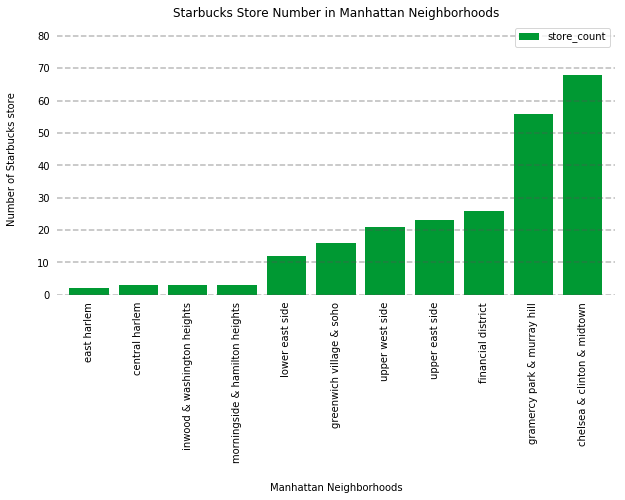

In [20]:
# PLOT BARCHART
    # Plot
import matplotlib.pyplot as plt
ax2 = star_man_neigh_group.plot(kind='bar', x='neighborhood', y='store_count', figsize=(10, 5), color='#009933', width=0.8)
ax2.set_title('Starbucks Store Number in Manhattan Neighborhoods')
    # Disable spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
    # Switch off ticks
ax2.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
    # Set x-axis label
ax2.set_xlabel("Manhattan Neighborhoods", labelpad=20)
    # Set y-axis label
ax2.set_ylabel("Number of Starbucks store", labelpad=20)
    # Draw vertical axis lines
vals = ax2.get_yticks()
for tick in vals:
    ax2.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#555555', zorder=1)
plt.show() 

#### 2.3.3 Import neighborhood data
Neighborhood data in Manhattan is collected, features include demographics, housing market, land-use and development, neighborhood service and rentals.
- http://furmancenter.org/neighborhoods

In [21]:
# AFTER DOWNLOAD EXCEL DATA FROM FURMANCENTER, IMPORT DATA
man_neigh_data = pd.read_excel(r'C:\Users\ASUS\Downloads\manhattan_data\manhattan_data.xlsx')
man_neigh_data = man_neigh_data.dropna(axis=1)
man_neigh_data

neighborhood  Born in New York State  \
0   central harlem                  0.533                    
1   chelsea & clinton & midtown     0.330                    
2   east harlem                     0.570                    
3   financial district              0.378                    
4   gramercy park & murray hill     0.413                    
5   greenwich village & soho        0.378                    
6   inwood & washington heights     0.370                    
7   lower east side                 0.394                    
8   morningside & hamilton heights  0.424                    
9   upper east side                 0.480                    
10  upper west side                 0.476                    

    Disabled population  Foreign-born population  Population  \
0   0.087                0.252                    147442       
1   0.063                0.325                    152455       
2   0.136                0.255                    128316       
3   0.033                0.229                    148982       
4   0.017                0.226                    149674       
5   0.033                0.229                    148982       
6   0.083                0.440                    219998       
7   0.059                0.360                    160490       
8   0.059                0.313                    136017       
9   0.030                0.229                    214219       
10  0.065                0.176                    207134       

    Population aged 65+  Households with children under 18 years old  \
0   0.114                0.264                                         
1   0.135                0.084                                         
2   0.128                0.250                                         
3   0.143                0.161                                         
4   0.178                0.099                                         
5   0.143                0.161                                         
6   0.149                0.234                                         
7   0.195                0.163                                         
8   0.131                0.211                                         
9   0.192                0.175                                         
10  0.201                0.208                                         

    Single-person households  Percent Asian  Percent black  Percent Hispanic  \
0   0.389                     0.041          0.530          0.247              
1   0.594                     0.156          0.068          0.156              
2   0.449                     0.083          0.264          0.519              
3   0.475                     0.165          0.021          0.057              
4   0.513                     0.149          0.040          0.099              
5   0.475                     0.165          0.021          0.057              
6   0.310                     0.024          0.083          0.669              
7   0.464                     0.361          0.065          0.236              
8   0.350                     0.102          0.224          0.365              
9   0.444                     0.107          0.014          0.108              
10  0.426                     0.087          0.057          0.131              

    Percent white  Racial diversity index  Income diversity ratio  \
0   0.149          0.63                    9.3                      
1   0.593          0.59                    7.5                      
2   0.119          0.64                    6.5                      
3   0.722          0.45                    6.6                      
4   0.685          0.50                    5.9                      
5   0.722          0.45                    6.6                      
6   0.202          0.50                    5.7                      
7   0.310          0.71                    8.5                      
8   0.285          0.73                    8.2               

In [22]:
star_man_neigh = pd.merge(star_man_neigh_group, man_neigh_data, how='left', on=['neighborhood'])
star_man_neigh

neighborhood  store_count  Born in New York State  \
0   east harlem                     2            0.570                    
1   central harlem                  3            0.533                    
2   inwood & washington heights     3            0.370                    
3   morningside & hamilton heights  3            0.424                    
4   lower east side                 12           0.394                    
5   greenwich village & soho        16           0.378                    
6   upper west side                 21           0.476                    
7   upper east side                 23           0.480                    
8   financial district              26           0.378                    
9   gramercy park & murray hill     56           0.413                    
10  chelsea & clinton & midtown     68           0.330                    

    Disabled population  Foreign-born population  Population  \
0   0.136                0.255                    128316       
1   0.087                0.252                    147442       
2   0.083                0.440                    219998       
3   0.059                0.313                    136017       
4   0.059                0.360                    160490       
5   0.033                0.229                    148982       
6   0.065                0.176                    207134       
7   0.030                0.229                    214219       
8   0.033                0.229                    148982       
9   0.017                0.226                    149674       
10  0.063                0.325                    152455       

    Population aged 65+  Households with children under 18 years old  \
0   0.128                0.250                                         
1   0.114                0.264                                         
2   0.149                0.234                                         
3   0.131                0.211                                         
4   0.195                0.163                                         
5   0.143                0.161                                         
6   0.201                0.208                                         
7   0.192                0.175                                         
8   0.143                0.161                                         
9   0.178                0.099                                         
10  0.135                0.084                                         

    Single-person households  Percent Asian  Percent black  Percent Hispanic  \
0   0.449                     0.083          0.264          0.519              
1   0.389                     0.041          0.530          0.247              
2   0.310                     0.024          0.083          0.669              
3   0.350                     0.102          0.224          0.365              
4   0.464                     0.361          0.065          0.236              
5   0.475                     0.165          0.021          0.057              
6   0.426                     0.087          0.057          0.131              
7   0.444                     0.107          0.014          0.108              
8   0.475                     0.165          0.021          0.057              
9   0.513                     0.149          0.040          0.099              
10  0.594                     0.156          0.068          0.156              

    Percent white  Racial diversity index  Income diversity ratio  \
0   0.119          0.64                    6.5                      
1   0.149          0.63                    9.3                      
2   0.202          0.50                    5.7                      
3   0.285          0.73                    8.2                      
4   0.310          0.71                    8.5                      
5   0.722          0.45                    6.6                      
6   0.691          0.49                    

#### 2.3.4 Import venues (POI) data around neighborhoods
Venues data around these neighbourhoods in Manhattan are collected via Foursquare API.
- https://developer.foursquare.com/

In [23]:
# GET LATITUDE AND LONGITUDE TO EACH NEIGHBORHOOD
star_man_neigh_group_geo = star_man_neigh_all.drop(['address', 'city','state_ab','country','postcode'],1)
star_man_neigh_group_geo = star_man_neigh_group_geo.groupby(['neighborhood']).mean()
star_man_neigh_group_geo.reset_index(inplace=True, drop=False)
star_man_neigh_group_geo

neighborhood       long        lat
0   central harlem                 -73.950000  40.810000
1   chelsea & clinton & midtown    -73.988088  40.755441
2   east harlem                    -73.940000  40.795000
3   financial district             -74.010385  40.707692
4   gramercy park & murray hill    -73.977500  40.751429
5   greenwich village & soho       -74.002500  40.726250
6   inwood & washington heights    -73.936667  40.853333
7   lower east side                -73.988333  40.730833
8   morningside & hamilton heights -73.953333  40.813333
9   upper east side                -73.956522  40.773043
10  upper west side                -73.975238  40.785238

In [24]:
# DATA VISUALIZATION OF STARBUCK STORE IN MANHATTAN
m4 = folium.Map(
    location=[40.775, -73.975],
    tiles='cartodbpositron',
    zoom_start=12,
    width=500,
    height=800,
)
for i in range(0,len(star_man_group)):
   folium.Circle(
       location=[star_man_group['lat'].iloc[i], star_man_group['long'].iloc[i]],
       radius=star_man_group['store_count'].iloc[i]*30,
       color=False,
       fill=True,
       fill_color='#009933', 
       fill_opacity=0.2,
   ).add_to(m4)
m4

for lat, lng, label in zip(star_man_neigh_group_geo['lat'], star_man_neigh_group_geo['long'], star_man_neigh_group_geo['neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#996600',
        fill=True,
        fill_color='#996600',
        fill_opacity=0.8,
        parse_html=False).add_to(m4)  
m4

The coffee color spots are the suggested location to achieve POI data in each neighborhood.

In [25]:
CLIENT_ID = 'FLIBHBVNAJUWHIPE0FMNXZ3I2SREYBWESSFMVFBH3XI5J3MT'
CLIENT_SECRET = 'ILHB2MD3BCAPFFZSA2CLAOWAF4XNW4M5RK2V3PNK0XU0YQ0R'
VERSION = '20190504' 

In [26]:
neighbourhood_latitude = star_man_neigh_group_geo.loc[0, 'lat'] # neighborhood latitude value
neighbourhood_longitude = star_man_neigh_group_geo.loc[0, 'long'] # neighborhood longitude value

neighbourhood_name = star_man_neigh_group_geo.loc[0, 'neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
url

Latitude and longitude values of central harlem are 40.81, -73.94999999999999.


'https://api.foursquare.com/v2/venues/explore?&client_id=FLIBHBVNAJUWHIPE0FMNXZ3I2SREYBWESSFMVFBH3XI5J3MT&client_secret=ILHB2MD3BCAPFFZSA2CLAOWAF4XNW4M5RK2V3PNK0XU0YQ0R&v=20190504&ll=40.81,-73.94999999999999&radius=500&limit=200'

In [27]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cccf1199fb6b75700b2c21a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Central Harlem',
  'headerFullLocation': 'Central Harlem, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 120,
  'suggestedBounds': {'ne': {'lat': 40.814500004500005,
    'lng': -73.94406564245574},
   'sw': {'lat': 40.8054999955, 'lng': -73.95593435754424}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '3fd66200f964a520f5ea1ee3',
       'name': 'Apollo Theater',
       'location': {'address': '253 W 125th St',
        'crossStreet': 'btwn 7th & 8th Ave',
        'lat': 40.80986187551455,
        'lng'

In [28]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [29]:
from pandas.io.json import json_normalize 

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

name                       categories        lat  \
0   Apollo Theater                 Theater                          40.809862   
1   Artist & Craftsman Supply      Arts & Crafts Store              40.809375   
2   Delhi Masala                   Indian Restaurant                40.808241   
3   Blink Fitness 125th            Gym                              40.810376   
4   Studio Museum in Harlem        Art Museum                       40.808649   
5   House of Hoops                 Sporting Goods Shop              40.809683   
6   Unity Yoga                     Yoga Studio                      40.812335   
7   Maison Harlem                  French Restaurant                40.812110   
8   Aloft Harlem                   Hotel                            40.809020   
9   Tropical Grill & Restaurant    Spanish Restaurant               40.810583   
10  Blick Art Materials            Arts & Crafts Store              40.810065   
11  DSW Designer Shoe Warehouse    Shoe Store                       40.810554   
12  Angel Of Harlem                Caribbean Restaurant             40.808143   
13  BTL Wines & Spirits            Wine Shop                        40.811954   
14  Clay                           American Restaurant              40.809549   
15  Planet Fitness                 Gym / Fitness Center             40.809132   
16  Nabe Underground Lounge        Lounge                           40.811587   
17  babbalucci                     Pizza Place                      40.808875   
18  Carter's                       Kids Store                       40.809404   
19  Flamekeepers Hat Club          Men's Store                      40.807508   
20  Paris Blues                    Jazz Club                        40.806536   
21  Whole Foods Market             Grocery Store                    40.807781   
22  Showman's                      Jazz Club                        40.811236   
23  Red Rooster                    Southern / Soul Food Restaurant  40.808027   
24  Harlem Besame                  Spanish Restaurant               40.808186   
25  Levels Barbershop              Salon / Barbershop               40.812058   
26  Ginny's Supper Club            Comfort Food Restaurant          40.808250   
27  Morningside Playground         Playground                       40.810073   
28  Harlem Shake                   Burger Joint                     40.807050   
29  Manna's Soul Food & Salad Bar  Southern / Soul Food Restaurant  40.810974   
..                            ...                              ...        ...   
70  Savann                         Turkish Restaurant               40.808528   
71  Capital One Bank               Bank                             40.810606   
72  Asian Fusion                   Japanese Restaurant              40.808147   
73  Jimbo's Hamburger Palace       Burger Joint                     40.807448   
74  Atmos                          Clothing Store                   40.809153   
75  Maysles Cinema                 Movie Theater                    40.809288   
76  Million Nail                   Cosmetics Shop                   40.810472   
77  Popeyes Louisiana Kitchen      Fried Chicken Joint              40.810792   
78  Dollar Tree                    Discount Store                   40.810308   
79  Buffalo Wild Wings             Wings Joint                      40.809849   
80  Jimmy Jazz                     Boutique                         40.808463   
81  MAC @ 125th St. Harlem         Cosmetics Shop                   40.809167   
82  Accra Restaurant               African Restaurant               40.807868   
83  Sprint Store                   Mobile Phone Shop                40.809449   
84  Harlem BBQ                     BBQ Joint                        40.811577   
85  St. Nicholas Gourmet Deli      Deli / Bodega                    40.810456   
86  Domino's Pizza                 Pizza Place                      40.811744   
87  Red Lobster                    Seafood Restaurant       

In [30]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['neighborhood', 
                  'neighborhood_lat', 
                  'neighborhood_long', 
                  'venue', 
                  'venue_lat', 
                  'venue_long', 
                  'venue_category']
    
    return(nearby_venues)

manhattan_venues = getNearbyVenues(names=star_man_neigh_group_geo['neighborhood'],
                                   latitudes=star_man_neigh_group_geo['lat'],
                                   longitudes=star_man_neigh_group_geo['long']
                                  )

central harlem
chelsea & clinton & midtown
east harlem
financial district
gramercy park & murray hill
greenwich village & soho
inwood & washington heights
lower east side
morningside & hamilton heights
upper east side
upper west side


In [32]:
print(manhattan_venues.shape)
manhattan_venues

(1100, 7)


neighborhood  neighborhood_lat  neighborhood_long  \
0     central harlem   40.810000        -73.950000           
1     central harlem   40.810000        -73.950000           
2     central harlem   40.810000        -73.950000           
3     central harlem   40.810000        -73.950000           
4     central harlem   40.810000        -73.950000           
5     central harlem   40.810000        -73.950000           
6     central harlem   40.810000        -73.950000           
7     central harlem   40.810000        -73.950000           
8     central harlem   40.810000        -73.950000           
9     central harlem   40.810000        -73.950000           
10    central harlem   40.810000        -73.950000           
11    central harlem   40.810000        -73.950000           
12    central harlem   40.810000        -73.950000           
13    central harlem   40.810000        -73.950000           
14    central harlem   40.810000        -73.950000           
15    central harlem   40.810000        -73.950000           
16    central harlem   40.810000        -73.950000           
17    central harlem   40.810000        -73.950000           
18    central harlem   40.810000        -73.950000           
19    central harlem   40.810000        -73.950000           
20    central harlem   40.810000        -73.950000           
21    central harlem   40.810000        -73.950000           
22    central harlem   40.810000        -73.950000           
23    central harlem   40.810000        -73.950000           
24    central harlem   40.810000        -73.950000           
25    central harlem   40.810000        -73.950000           
26    central harlem   40.810000        -73.950000           
27    central harlem   40.810000        -73.950000           
28    central harlem   40.810000        -73.950000           
29    central harlem   40.810000        -73.950000           
...              ...         ...               ...           
1070  upper west side  40.785238        -73.975238           
1071  upper west side  40.785238        -73.975238           
1072  upper west side  40.785238        -73.975238           
1073  upper west side  40.785238        -73.975238           
1074  upper west side  40.785238        -73.975238           
1075  upper west side  40.785238        -73.975238           
1076  upper west side  40.785238        -73.975238           
1077  upper west side  40.785238        -73.975238           
1078  upper west side  40.785238        -73.975238           
1079  upper west side  40.785238        -73.975238           
1080  upper west side  40.785238        -73.975238           
1081  upper west side  40.785238        -73.975238           
1082  upper west side  40.785238        -73.975238           
1083  upper west side  40.785238        -73.975238           
1084  upper west side  40.785238        -73.975238           
1085  upper west side  40.785238        -73.975238           
1086  upper west side  40.785238        -73.975238           
1087  upper west side  40.785238        -73.975238           
1088  upper west side  40.785238        -73.975238           
1089  upper west side  40.785238        -73.975238           
1090  upper west side  40.785238        -73.975238           
1091  upper west side  40.785238        -73.975238           
1092  upper west side  40.785238        -73.975238           
1093  upper west side  40.785238        -73.975238           
1094  upper west side  40.785238        -73.975238           
1095  upper west side  40.785238        -73.975238           
1096  upper west side  40.785238        -73.975238           
1097  upper west side  40.785238        -73.975238           
1098  upper west side  40.785238        -73.975238           
1099  upper west side  40.785238        -73.975238           

                                               venue  venue_lat  venue_long  \
0     Apollo Theater                                  40.809862 -73.950188    
1     

In [33]:
# REMOVE ROWS THAT HAVE STARBUCKS
manhattan_venues_no_star = manhattan_venues[~manhattan_venues['venue'].str.contains("Starbucks")]
manhattan_venues_no_star

neighborhood  neighborhood_lat  neighborhood_long  \
0     central harlem   40.810000        -73.950000           
1     central harlem   40.810000        -73.950000           
2     central harlem   40.810000        -73.950000           
3     central harlem   40.810000        -73.950000           
4     central harlem   40.810000        -73.950000           
5     central harlem   40.810000        -73.950000           
6     central harlem   40.810000        -73.950000           
7     central harlem   40.810000        -73.950000           
8     central harlem   40.810000        -73.950000           
9     central harlem   40.810000        -73.950000           
10    central harlem   40.810000        -73.950000           
11    central harlem   40.810000        -73.950000           
12    central harlem   40.810000        -73.950000           
13    central harlem   40.810000        -73.950000           
14    central harlem   40.810000        -73.950000           
15    central harlem   40.810000        -73.950000           
16    central harlem   40.810000        -73.950000           
17    central harlem   40.810000        -73.950000           
18    central harlem   40.810000        -73.950000           
19    central harlem   40.810000        -73.950000           
20    central harlem   40.810000        -73.950000           
21    central harlem   40.810000        -73.950000           
22    central harlem   40.810000        -73.950000           
23    central harlem   40.810000        -73.950000           
24    central harlem   40.810000        -73.950000           
25    central harlem   40.810000        -73.950000           
26    central harlem   40.810000        -73.950000           
27    central harlem   40.810000        -73.950000           
28    central harlem   40.810000        -73.950000           
29    central harlem   40.810000        -73.950000           
...              ...         ...               ...           
1070  upper west side  40.785238        -73.975238           
1071  upper west side  40.785238        -73.975238           
1072  upper west side  40.785238        -73.975238           
1073  upper west side  40.785238        -73.975238           
1074  upper west side  40.785238        -73.975238           
1075  upper west side  40.785238        -73.975238           
1076  upper west side  40.785238        -73.975238           
1077  upper west side  40.785238        -73.975238           
1078  upper west side  40.785238        -73.975238           
1079  upper west side  40.785238        -73.975238           
1080  upper west side  40.785238        -73.975238           
1081  upper west side  40.785238        -73.975238           
1082  upper west side  40.785238        -73.975238           
1083  upper west side  40.785238        -73.975238           
1084  upper west side  40.785238        -73.975238           
1085  upper west side  40.785238        -73.975238           
1086  upper west side  40.785238        -73.975238           
1087  upper west side  40.785238        -73.975238           
1088  upper west side  40.785238        -73.975238           
1089  upper west side  40.785238        -73.975238           
1090  upper west side  40.785238        -73.975238           
1091  upper west side  40.785238        -73.975238           
1092  upper west side  40.785238        -73.975238           
1093  upper west side  40.785238        -73.975238           
1094  upper west side  40.785238        -73.975238           
1095  upper west side  40.785238        -73.975238           
1096  upper west side  40.785238        -73.975238           
1097  upper west side  40.785238        -73.975238           
1098  upper west side  40.785238        -73.975238           
1099  upper west side  40.785238        -73.975238           

                                               venue  venue_lat  venue_long  \
0     Apollo Theater                                  40.809862 -73.950188    
1     

In [34]:
manhattan_venues_no_star.groupby('neighborhood').count()

neighborhood_lat  neighborhood_long  venue  \
neighborhood                                                                 
central harlem                  100               100                100     
chelsea & clinton & midtown     100               100                100     
east harlem                     100               100                100     
financial district              100               100                100     
gramercy park & murray hill     100               100                100     
greenwich village & soho        100               100                100     
inwood & washington heights     99                99                 99      
lower east side                 100               100                100     
morningside & hamilton heights  100               100                100     
upper east side                 100               100                100     
upper west side                 100               100                100     

                                venue_lat  venue_long  venue_category  
neighborhood                                                           
central harlem                  100        100         100             
chelsea & clinton & midtown     100        100         100             
east harlem                     100        100         100             
financial district              100        100         100             
gramercy park & murray hill     100        100         100             
greenwich village & soho        100        100         100             
inwood & washington heights     99         99          99              
lower east side                 100        100         100             
morningside & hamilton heights  100        100         100             
upper east side                 100        100         100             
upper west side                 100        100         100

In [35]:
print('There are {} uniques categories.'.format(len(manhattan_venues_no_star['venue_category'].unique())))

There are 197 uniques categories.


In [36]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues_no_star[['venue_category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
manhattan_onehot['neighborhood'] = manhattan_venues_no_star['neighborhood'] 

# move neighbourhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]
manhattan_onehot.head()

neighborhood  Accessories Store  American Restaurant  Arepa Restaurant  \
0  central harlem  0                  0                    0                  
1  central harlem  0                  0                    0                  
2  central harlem  0                  0                    0                  
3  central harlem  0                  0                    0                  
4  central harlem  0                  0                    0                  

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  Auditorium  \
0  0            0           0                    0                 0            
1  0            0           1                    0                 0            
2  0            0           0                    0                 0            
3  0            1           0                    0                 0            
4  0            0           0                    0                 0            

   BBQ Joint  Bagel Shop  Bakery  Bar  Beer Bar  Beer Store  Big Box Store  \
0  0          0           0       0    0         0           0               
1  0          0           0       0    0         0           0               
2  0          0           0       0    0         0           0               
3  0          0           0       0    0         0           0               
4  0          0           0       0    0         0           0               

   Bike Trail  Bistro  Bookstore  Boutique  Boxing Gym  Breakfast Spot  \
0  0           0       0          0         0           0                
1  0           0       0          0         0           0                
2  0           0       0          0         0           0                
3  0           0       0          0         0           0                
4  0           0       0          0         0           0                

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Café  \
0  0                0         0             0              0      
1  0                0         0             0              0      
2  0                0         0             0              0      
3  0                0         0             0              0      
4  0                0         0             0              0      

   Cajun / Creole Restaurant  Caribbean Restaurant  Cheese Shop  \
0  0                          0                     0             
1  0                          0                     0             
2  0                          0                     0             
3  0                          0                     0             
4  0                          0                     0             

   Chinese Restaurant  Climbing Gym  Clothing Store  Cocktail Bar  \
0  0                   0             0               0              
1  0                   0             0               0              
2  0                   0             0               0              
3  0                   0             0               0              
4  0                   0             0               0              

   Coffee Shop  Comedy Club  Comfort Food Restaurant  Comic Shop  \
0  0            0            0                        0            
1  0            0            0                        0            
2  0            0            0                        0            
3  0            0            0                        0            
4  0            0            0                        0            

   Concert Hall  Convenience Store  Cosmetics Shop  Coworking Space  \
0  0             0                  0               0                 
1  0             0                  0               0                 
2  0             0                  0               0                 
3  0             0                  0               0                 
4  0             0                  0               0                 

   Cuban Restaurant  Cupcake Shop  Cycle Studio  Czech Restaurant  \
0  

In [37]:
manhattan_group_sum = manhattan_onehot.groupby('neighborhood').sum().reset_index()
manhattan_group_sum

neighborhood  Accessories Store  American Restaurant  \
0   central harlem                  0                  3                     
1   chelsea & clinton & midtown     0                  0                     
2   east harlem                     0                  0                     
3   financial district              0                  1                     
4   gramercy park & murray hill     0                  1                     
5   greenwich village & soho        0                  3                     
6   inwood & washington heights     1                  1                     
7   lower east side                 0                  0                     
8   morningside & hamilton heights  0                  4                     
9   upper east side                 0                  2                     
10  upper west side                 0                  3                     

    Arepa Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0   0                 2            1           2                     
1   0                 1            0           1                     
2   0                 0            1           0                     
3   0                 0            0           0                     
4   0                 0            0           0                     
5   0                 0            1           1                     
6   1                 0            0           0                     
7   1                 1            0           1                     
8   0                 2            1           2                     
9   0                 0            0           0                     
10  0                 0            0           1                     

    Asian Restaurant  Auditorium  BBQ Joint  Bagel Shop  Bakery  Bar  \
0   0                 0           0          1           2       0     
1   0                 0           0          1           2       0     
2   0                 0           0          0           7       1     
3   0                 1           0          1           0       1     
4   0                 0           0          0           1       1     
5   0                 0           0          1           1       0     
6   1                 0           0          0           5       3     
7   1                 0           1          1           1       1     
8   1                 0           1          0           2       0     
9   0                 0           1          1           5       4     
10  1                 0           0          1           3       3     

    Beer Bar  Beer Store  Big Box Store  Bike Trail  Bistro  Bookstore  \
0   2         0           0              0           1       1           
1   0         0           0              0           0       1           
2   2         0           1              0           0       0           
3   0         0           0              0           0       0           
4   0         0           0              0           0       2           
5   1         1           0              0           0       1           
6   0         0           0              0           0       0           
7   0         1           0              0           0       1           
8   1         0           0              1           1       0           
9   0         0           0              0           0       0           
10  0         1           0              0           0       2           

    Boutique  Boxing Gym  Breakfast Spot  Bubble Tea Shop  Building  \
0   2         0           0               0                0          
1   1         0           0               0                0          
2   0         0           0               0                0          
3   0         0           1               0                0          
4   1         1           0               1                1          
5   1         0           0               0                0    

In [38]:
star_man_neigh_venue = pd.merge(star_man_neigh_group, manhattan_group_sum, how='left', on=['neighborhood'])
star_man_neigh_venue

neighborhood  store_count  Accessories Store  \
0   east harlem                     2            0                   
1   central harlem                  3            0                   
2   inwood & washington heights     3            1                   
3   morningside & hamilton heights  3            0                   
4   lower east side                 12           0                   
5   greenwich village & soho        16           0                   
6   upper west side                 21           0                   
7   upper east side                 23           0                   
8   financial district              26           0                   
9   gramercy park & murray hill     56           0                   
10  chelsea & clinton & midtown     68           0                   

    American Restaurant  Arepa Restaurant  Art Gallery  Art Museum  \
0   0                    0                 0            1            
1   3                    0                 2            1            
2   1                    1                 0            0            
3   4                    0                 2            1            
4   0                    1                 1            0            
5   3                    0                 0            1            
6   3                    0                 0            0            
7   2                    0                 0            0            
8   1                    0                 0            0            
9   1                    0                 0            0            
10  0                    0                 1            0            

    Arts & Crafts Store  Asian Restaurant  Auditorium  BBQ Joint  Bagel Shop  \
0   0                    0                 0           0          0            
1   2                    0                 0           0          1            
2   0                    1                 0           0          0            
3   2                    1                 0           1          0            
4   1                    1                 0           1          1            
5   1                    0                 0           0          1            
6   1                    1                 0           0          1            
7   0                    0                 0           1          1            
8   0                    0                 1           0          1            
9   0                    0                 0           0          0            
10  1                    0                 0           0          1            

    Bakery  Bar  Beer Bar  Beer Store  Big Box Store  Bike Trail  Bistro  \
0   7       1    2         0           1              0           0        
1   2       0    2         0           0              0           1        
2   5       3    0         0           0              0           0        
3   2       0    1         0           0              1           1        
4   1       1    0         1           0              0           0        
5   1       0    1         1           0              0           0        
6   3       3    0         1           0              0           0        
7   5       4    0         0           0              0           0        
8   0       1    0         0           0              0           0        
9   1       1    0         0           0              0           0        
10  2       0    0         0           0              0           0        

    Bookstore  Boutique  Boxing Gym  Breakfast Spot  Bubble Tea Shop  \
0   0          0         0           0               0                 
1   1          2         0           0               0                 
2   0          0         0           1               0                 
3   0          1         0           0               0                 
4   1          0         0           0               1                 
5   1          1         0        

#### 2.3.5 For clustering purpose data

In [39]:
manhattan_grouped = manhattan_onehot.groupby('neighborhood').mean().reset_index()
manhattan_grouped

neighborhood  Accessories Store  American Restaurant  \
0   central harlem                  0.000000           0.030000              
1   chelsea & clinton & midtown     0.000000           0.000000              
2   east harlem                     0.000000           0.000000              
3   financial district              0.000000           0.010000              
4   gramercy park & murray hill     0.000000           0.010000              
5   greenwich village & soho        0.000000           0.030000              
6   inwood & washington heights     0.010101           0.010101              
7   lower east side                 0.000000           0.000000              
8   morningside & hamilton heights  0.000000           0.040000              
9   upper east side                 0.000000           0.020000              
10  upper west side                 0.000000           0.030000              

    Arepa Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0   0.000000          0.02         0.01        0.02                  
1   0.000000          0.01         0.00        0.01                  
2   0.000000          0.00         0.01        0.00                  
3   0.000000          0.00         0.00        0.00                  
4   0.000000          0.00         0.00        0.00                  
5   0.000000          0.00         0.01        0.01                  
6   0.010101          0.00         0.00        0.00                  
7   0.010000          0.01         0.00        0.01                  
8   0.000000          0.02         0.01        0.02                  
9   0.000000          0.00         0.00        0.00                  
10  0.000000          0.00         0.00        0.01                  

    Asian Restaurant  Auditorium  BBQ Joint  Bagel Shop    Bakery       Bar  \
0   0.000000          0.00        0.00       0.01        0.020000  0.000000   
1   0.000000          0.00        0.00       0.01        0.020000  0.000000   
2   0.000000          0.00        0.00       0.00        0.070000  0.010000   
3   0.000000          0.01        0.00       0.01        0.000000  0.010000   
4   0.000000          0.00        0.00       0.00        0.010000  0.010000   
5   0.000000          0.00        0.00       0.01        0.010000  0.000000   
6   0.010101          0.00        0.00       0.00        0.050505  0.030303   
7   0.010000          0.00        0.01       0.01        0.010000  0.010000   
8   0.010000          0.00        0.01       0.00        0.020000  0.000000   
9   0.000000          0.00        0.01       0.01        0.050000  0.040000   
10  0.010000          0.00        0.00       0.01        0.030000  0.030000   

    Beer Bar  Beer Store  Big Box Store  Bike Trail  Bistro  Bookstore  \
0   0.02      0.00        0.00           0.00        0.01    0.01        
1   0.00      0.00        0.00           0.00        0.00    0.01        
2   0.02      0.00        0.01           0.00        0.00    0.00        
3   0.00      0.00        0.00           0.00        0.00    0.00        
4   0.00      0.00        0.00           0.00        0.00    0.02        
5   0.01      0.01        0.00           0.00        0.00    0.01        
6   0.00      0.00        0.00           0.00        0.00    0.00        
7   0.00      0.01        0.00           0.00        0.00    0.01        
8   0.01      0.00        0.00           0.01        0.01    0.00        
9   0.00      0.00        0.00           0.00        0.00    0.00        
10  0.00      0.01        0.00           0.00        0.00    0.02        

    Boutique  Boxing Gym  Breakfast Spot  Bubble Tea Shop  Building  \
0   0.02      0.00        0.000000        0.00             0.00       
1   0.01      0.00        0.000000        0.00             0.00       
2   0.00      0.00        0.000000        0.00             0.00       
3   0.00      0.00        0.010000        0.00             0.00       
4   0.01      0.01        0.000000        0.01     

In [40]:
num_top_venues = 5

for hood in manhattan_grouped['neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----central harlem----
                             venue  freq
0  Southern / Soul Food Restaurant  0.05
1  French Restaurant                0.05
2  Jazz Club                        0.05
3  Wine Shop                        0.04
4  Seafood Restaurant               0.04


----chelsea & clinton & midtown----
                 venue  freq
0  Theater              0.30
1  Hotel                0.06
2  Yoga Studio          0.03
3  Coffee Shop          0.03
4  Japanese Restaurant  0.03


----east harlem----
                       venue  freq
0  Mexican Restaurant         0.08
1  Bakery                     0.07
2  Pizza Place                0.05
3  Café                       0.04
4  Latin American Restaurant  0.04


----financial district----
         venue  freq
0  Coffee Shop  0.08
1  Hotel        0.05
2  Café         0.04
3  Steakhouse   0.04
4  Pizza Place  0.04


----gramercy park & murray hill----
                  venue  freq
0  Coffee Shop           0.06
1  Japanese Restaurant   0.05
2  G

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
man_neigh_venues_sorted = pd.DataFrame(columns=columns)
man_neigh_venues_sorted['neighborhood'] = manhattan_grouped['neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    man_neigh_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

man_neigh_venues_sorted

neighborhood 1st Most Common Venue  \
0   central harlem                  Jazz Club              
1   chelsea & clinton & midtown     Theater                
2   east harlem                     Mexican Restaurant     
3   financial district              Coffee Shop            
4   gramercy park & murray hill     Coffee Shop            
5   greenwich village & soho        Italian Restaurant     
6   inwood & washington heights     Pizza Place            
7   lower east side                 Ice Cream Shop         
8   morningside & hamilton heights  Seafood Restaurant     
9   upper east side                 Italian Restaurant     
10  upper west side                 Park                   

            2nd Most Common Venue            3rd Most Common Venue  \
0   French Restaurant              Southern / Soul Food Restaurant   
1   Hotel                          Yoga Studio                       
2   Bakery                         Pizza Place                       
3   Hotel                          Pizza Place                       
4   Japanese Restaurant            Park                              
5   Seafood Restaurant             Coffee Shop                       
6   Bakery                         Grocery Store                     
7   Vegetarian / Vegan Restaurant  Coffee Shop                       
8   Coffee Shop                    Italian Restaurant                
9   Gym / Fitness Center           Bakery                            
10  Yoga Studio                    Coffee Shop                       

        4th Most Common Venue 5th Most Common Venue  \
0   Wine Shop                  Seafood Restaurant     
1   Japanese Restaurant        Coffee Shop            
2   Latin American Restaurant  Café                   
3   Café                       Steakhouse             
4   Hotel                      Gym / Fitness Center   
5   Pizza Place                American Restaurant    
6   Café                       Park                   
7   Yoga Studio                Wine Shop              
8   Wine Shop                  American Restaurant    
9   Bar                        Sushi Restaurant       
10  Exhibit                    Sushi Restaurant       

              6th Most Common Venue 7th Most Common Venue  \
0   Coffee Shop                      Italian Restaurant     
1   Sushi Restaurant                 Bakery                 
2   Thai Restaurant                  Deli / Bodega          
3   Wine Shop                        Sandwich Place         
4   Grocery Store                    Chinese Restaurant     
5   Indie Movie Theater              Clothing Store         
6   Latin American Restaurant        Mexican Restaurant     
7   Gym                              Seafood Restaurant     
8   Southern / Soul Food Restaurant  Park                   
9   Thai Restaurant                  Ice Cream Shop         
10  Italian Restaurant               Bar                    

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0   Park                  American Restaurant   Theater                
1   Pizza Place           Plaza                 Burger Joint           
2   Park                  Italian Restaurant    Spa                    
3   Cocktail Bar          Park                  Gym                    
4   Steakhouse            Sandwich Place        Gym                    
5   Men's Store           French Restaurant     Café                   
6   Bar                   Deli / Bodega         Tapas Restaurant       
7   Cosmetics Shop        Pizza Place           Chinese Restaurant     
8   French Restaurant     Café                  Jazz Club              
9   Coffee Shop           Mexican Restaurant    Dessert Shop           
10  Bakery                Gym                   Planetarium

---
## 3_Methodology
In this project we will focus on cities in US that have high numbers of Starbucks, we will study what features will influence the most on the number of Sturbucks stores in these city candidates, both in city level and neighborhood level.

In city level, we will first conduct the study to investigate what demographic and economical feature (such as population, income, education, gender ratio, debt, mortgage and etc) is related the most to number of Starbucks store within US cities that has at least 100,000 population, the study is conducted via correlation matrix **[4.1]**. Next, we will discover what is the city we should focus in study the correlation of higher popularity by Lorenz Curve, Gini and Nakamoto Coefficient **[4.2]**. After identify the targeted city, we will explore the crucial features that highly impact on the density of Starbucks in one city by correlation matrix again **[4.3]**.

Next we will focus on the neighborhood scale. The characteristics of choosen neighborhoods in selected city will be studied further in terms of demographic, economical and POI composition **[4.4, 4.5]**. Clustering will be attempted to study the pattern of nearby POI composition **[4.6]**.

---
## 4_Analysis
In this phase we will perform data analysis and derive useful information from preprocessed data in phase 2. 

### 4.1 Correlation study of US cities that has at least 1 Starbucks
Let's study which feature is strongly related to number of store (ranging from 1 to 232) among all cities that has at least 1 store in US.

In [42]:
star_us_city_copy = star_us_city.copy()
star_us_city_copy_drop = ['state_ab']
star_us_city_copy.drop(star_us_city_copy_drop, inplace=True, axis=1)
star_us_city_copy.set_index('city',inplace=True)
cols = list(star_us_city_copy.columns)
cols = [cols[-1]] + cols[:-1]
star_us_city_copy = star_us_city_copy[cols]
star_us_city_copy

store_count     land_area  water_area  population  \
city                                                                  
anchorage         24.0         1.102774e+09  493687174   150561       
eagle river       3.0          5.092349e+08  1859309     3727         
fairbanks         5.0          1.107154e+10  84662407    59503        
juneau            2.0          6.848156e+09  1422171690  20429        
ketchikan         1.0          1.257611e+10  4648192104  10677        
kodiak            1.0          8.436824e+07  20307304    4368         
north pole        1.0          1.527730e+08  2211465     16505        
palmer            2.0          4.756626e+08  3900859     17450        
soldotna          2.0          6.243345e+07  3599530     6610         
wasilla           4.0          4.463144e+08  86148942    42361        
alabaster         3.0          5.696130e+07  796184      16032        
athens            1.0          4.245059e+08  26678288    38264        
auburn            3.0          4.159423e+08  2559465     38030        
bessemer          1.0          1.675782e+08  6590032     24219        
birmingham        16.0         3.255505e+08  7734912     133518       
cullman           1.0          6.794599e+08  16270231    45163        
daphne            1.0          2.648176e+07  4121297     13056        
decatur           2.0          1.237016e+08  5094207     41865        
dothan            1.0          8.082558e+07  168730      40552        
florence          2.0          3.274654e+08  32112367    24189        
foley             1.0          2.552653e+08  12578657    28029        
gadsden           1.0          8.012372e+07  8030315     21557        
gardendale        1.0          3.051819e+07  20405       9587         
gulf shores       1.0          3.414632e+07  8917573     3600         
homewood          1.0          2.247712e+07  136477      26088        
hoover            5.0          6.651335e+07  1393365     47501        
huntsville        7.0          3.348755e+08  1942854     110573       
madison           3.0          2.576775e+08  33616832    30951        
mobile            10.0         2.479281e+08  15018467    107815       
montgomery        6.0          7.212328e+08  19154548    89278        
...                ...                  ...       ...       ...       
sturgeon bay      1.0          2.523641e+08  125355772   8759         
sun prairie       2.0          1.072903e+07  0           8670         
sussex            1.0          6.205690e+07  904001      10541        
tomah             1.0          2.797301e+07  1033359     6374         
waukesha          4.0          9.624020e+07  1063725     39068        
wausau            2.0          3.241343e+08  6745149     33676        
wauwatosa         8.0          1.620934e+07  0           17500        
west allis        2.0          1.425682e+07  81219       20671        
west bend         1.0          1.220171e+07  434734      8461         
west milwaukee    2.0          2.907307e+06  0           4222         
whitefish bay     1.0          4.219687e+06  2075629     9497         
barboursville     3.0          4.020732e+07  798904      15927        
beckley           2.0          1.235534e+08  1141111     9352         
charleston        3.0          1.903300e+08  2967766     43549        
clarksburg        1.0          1.685020e+08  62735       19351        
huntington        2.0          1.285875e+08  2289494     30986        
martinsburg       2.0          1.740281e+08  4287        35885        
morgantown        4.0          2.969157e+08  7277102     45353        
princeton         2.0          1.227446e+08  890296      20804        
south charleston  1.0          1.991002e+07  366211      8808         
weirton           1.0          2.531412e+07  1572964     12136        
wheeling          1.0          4.084140e+07  2830208     22872        
casper            4.0          8.347489e+07  531877      27071        
cheyenne          7.0          1.561581e+0

In [43]:
# PLOT CORRELATION MATRIX
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

star_corr = star_us_city_copy.corr()
star_corr = star_corr.sort_values('store_count', ascending=True)
star_corr

store_count  land_area  water_area  population  \
married                     -0.158301    -0.014849  -0.021097   -0.200299     
female_age_median           -0.114652    -0.007776   0.008760   -0.150167     
male_age_median             -0.099593    -0.011330   0.009410   -0.151280     
hc_median                   -0.049950    -0.145125  -0.014523   -0.098308     
hi_median                   -0.040923    -0.113922  -0.012415   -0.135296     
family_income_median        -0.035499    -0.108522  -0.011441   -0.144216     
home_equity                 -0.020918    -0.178248  -0.048222   -0.105841     
hs_degree_female            -0.019111    -0.028412   0.011906   -0.115034     
hs_degree                   -0.010939    -0.040387   0.007451   -0.111055     
divorced                    -0.007556     0.112843   0.055469    0.012011     
hs_degree_male              -0.002603    -0.051624   0.000560   -0.100271     
female_pop_ratio            -0.002174    -0.114238  -0.033021    0.027272     
home_equity_second_mortgage  0.001187    -0.059109  -0.028522   -0.036529     
male_pop_ratio               0.002174     0.114238   0.033021   -0.027272     
second_mortgage              0.003645    -0.069691  -0.022311   -0.037478     
hc_mortgage_median           0.012326    -0.135603  -0.018647   -0.079666     
separated                    0.013193     0.015027   0.006752    0.069739     
water_area                   0.017322     0.445478   1.000000    0.030664     
rent_gt_50                   0.024395    -0.035700  -0.020736    0.070980     
rent_gt_40                   0.029344    -0.035889  -0.019580    0.078255     
rent_median                  0.037445    -0.132685  -0.018202   -0.047649     
rent_gt_35                   0.037552    -0.041718  -0.024752    0.088414     
rent_gt_30                   0.041869    -0.033457  -0.023743    0.093140     
rent_gt_25                   0.043920    -0.037578  -0.025245    0.092761     
rent_gt_20                   0.049089    -0.063220  -0.021315    0.090262     
rent_gt_15                   0.050673    -0.045704   0.003591    0.081548     
rent_gt_10                   0.050835    -0.048576  -0.008918    0.081191     
debt                         0.070983    -0.115185  -0.034583    0.023852     
land_area                    0.109457     1.000000   0.445478    0.124825     
population_density           0.213834    -0.130427  -0.033347    0.190795     
female_population            0.818725     0.121813   0.030220    0.999730     
population                   0.823110     0.124825   0.030664    1.000000     
male_population              0.827243     0.127920   0.031113    0.999702     
store_count                  1.000000     0.109457   0.017322    0.823110     

                             male_population  female_population  \
married                     -0.199895        -0.200573            
female_age_median           -0.152291        -0.148064            
male_age_median             -0.153229        -0.149343            
hc_median                   -0.099104        -0.097496            
hi_median                   -0.134428        -0.136047            
family_income_median        -0.143708        -0.144619            
home_equity                 -0.105650        -0.105965            
hs_degree_female            -0.115588        -0.114444            
hs_degree                   -0.111531        -0.110542            
divorced                     0.011816         0.012190            
hs_degree_male              -0.100670        -0.099835            
female_pop_ratio             0.018691         0.035416            
home_equity_second_mortgage -0.035645        -0.037349            
male_pop_ratio              -0.018691        -0.035416            
second_mortgage             -0.036409        -0.038474            
hc_mortgage_median          -0.079232        -0.080035            
separated                    0.068284         0.071084            
water_area                   0.031113         0.030220   

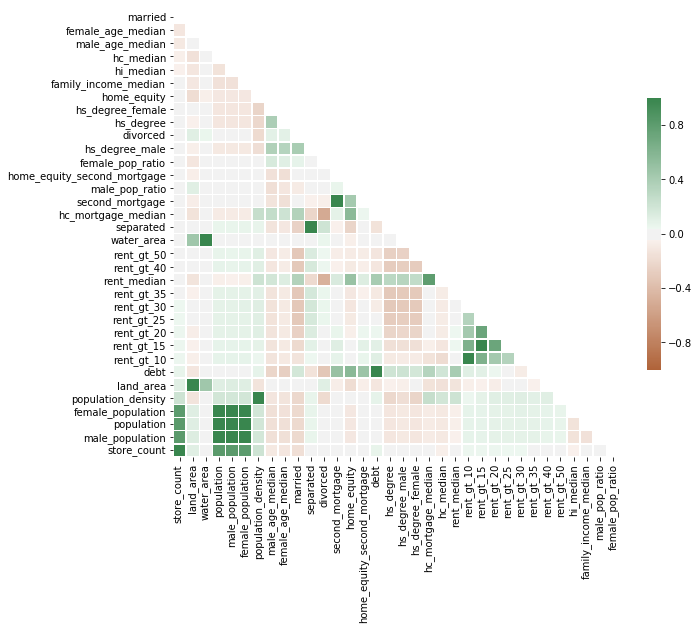

In [44]:
# Generate a mask for the upper triangle
mask = np.zeros_like(star_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(30, 135, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(star_corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

A correlation is a statistical measurement of the relationship between two variables. A zero correlation (white) indicates that there is no relationship between the variables. A correlation of 1 (starbuck green) indicates a perfect positive correlation, meaning that as one variable goes up, the other goes up too; while a correlation of –1 (coffee brown) indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

From correlation dataset and plot above, we can discover that **population** is the primary positive demographic factor to any number of Starbucks store in majority US cities (see the left column of triangle). However, population feature seems too general, as we all know that higher population will result in higher number of store. Besides, remaining features almost exhibit vague relationship with store number (almost around zero correlation). So we would like to study deeper, this time we targeted on cities has higher popularity of store.

### 4.2 Identify the city candidates has high popularity of Starbucks

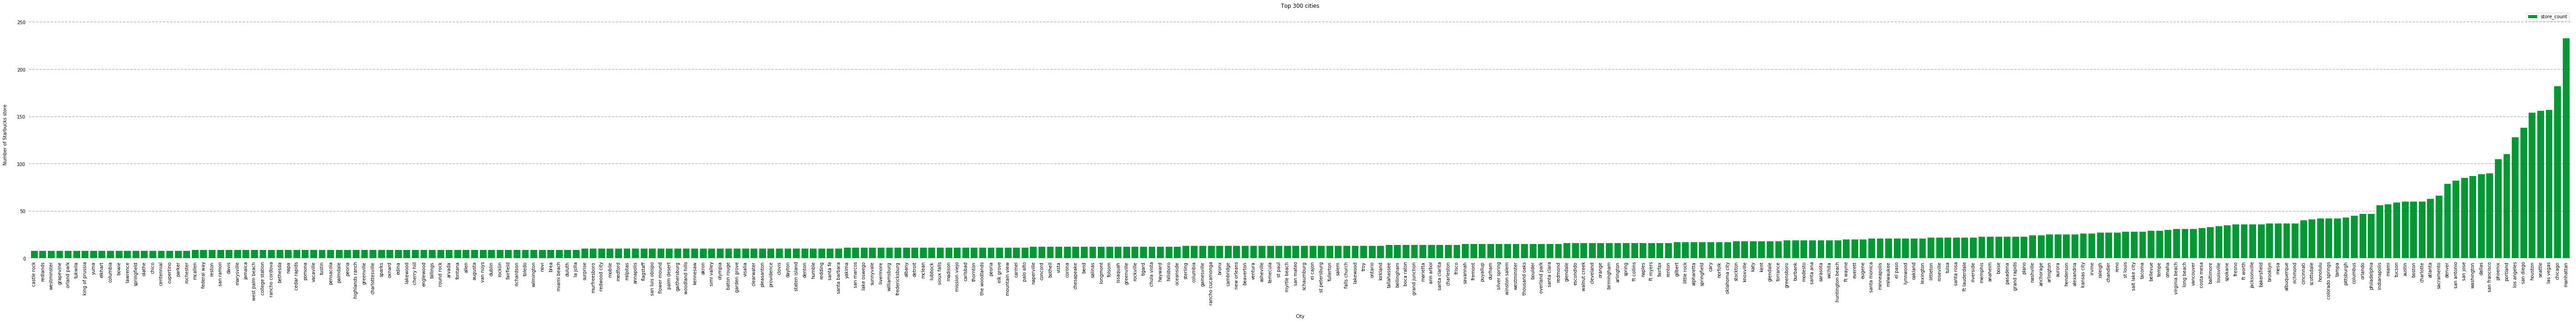

In [45]:
# PLOT BARCHART
    # Data for plot
starbuck_city_plot = starbuck_group.tail(300)
starbuck_city_plot.reset_index(inplace=True, drop=True)

    # Plot
import matplotlib.pyplot as plt
ax = starbuck_city_plot.plot(kind='bar', x='city', y='store_count', figsize=(100, 10), color='#009933', width=0.8)
ax.set_title('Top 300 cities')
    # Disable spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
    # Switch off ticks
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
    # Set x-axis label
ax.set_xlabel("City", labelpad=20)
    # Set y-axis label
ax.set_ylabel("Number of Starbucks store", labelpad=20)
    # Draw vertical axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#555555', zorder=1)
plt.show() 

There are more than 3000+ cities has at least one Starbucks store. From plot, we discovered that a classic "Lorenz Curve" is exhibited on the barchart. Usually Lorenz Curve is used to study income inequality, and it does exist too in the distribution of Starbucks store in US. Next we will study "Gini Coefficient" and "Nakamoto Coefficient" to calculate the inequality and plot it in Lorenz Curve to study the overall distribution (for further reference, please read https://news.earn.com/quantifying-decentralization-e39db233c28e).

In [46]:
# CALCULATE COEFFICIENTS
    # Convert dataframe to numpy array
# starbuck_group_2['store_count'] = starbuck_group['store_count'].astype(int)
starbuck_group_count = (starbuck_group['store_count'].astype(int)).to_numpy()
    # Setting
s_config = {'plot_notebook': True}
city = 'US City'

from nakamoto.sector import CustomSector
custom_sector = CustomSector(starbuck_group_count, city, 'Starbucks Store Distribution', **s_config)

gini = custom_sector.get_gini_coefficient()
print(gini)
nakamoto = custom_sector.get_nakamoto_coefficient()
print(nakamoto)

0.5962758017472531
295


The less Gini Coefficient, the less inequality. Hence, 0.6 could indicates the inequality distribution of store in cities of US is exist (also can be known as less decentralization). The Nakamoto Coefficient of 295 indicates that it only would require 295 entities (cities) occupy 51% of store distribution.<br>
3567*(1 - 0.9172974) ≈ 295
Now we are going to plot this Lorenz Curve.

In [47]:
# PLOT LORENZ CURVE # Figure 2
plot = custom_sector.get_plot() # move over Figure 2 to see detail

However, since this topic is to focus on cities with **high popularity**, so we would like to **increase 0.51 to 0.90**. Therefore the number of cities we should focus will be:<br>
3567*(1 - 0.997477) ≈ 9<br>

**This indicates that the top 9 cities (only 0.25% of 3567 cities) already occupy almost 10% of entire store distribution in US.** From Figure 1, you might also noticed that these 9 cities has all at least 100 store respectively. 

In [48]:
# TOP CITY CANDIDATES LIST
star_top_city_can = starbuck_group.tail(9)
star_top_city_can = star_top_city_can.sort_values('store_count', ascending=False)
star_top_city_can.reset_index(inplace=True, drop=True)
star_top_city_can

city state_ab  store_count
0  manhattan    NY       233.0      
1  chicago      IL       182.0      
2  las vegas    NV       157.0      
3  seattle      WA       156.0      
4  houston      TX       154.0      
5  san diego    CA       138.0      
6  los angeles  CA       128.0      
7  portland     OR       110.0      
8  phoenix      AZ       105.0

The top 9 city candidates that we will going to study further are: **Manhattan, Chicago, Las Vegas, Seattle, Houston, San Diego, Los Angeles, Portland and Phoenix**.

### 4.3 Correlation study of US cities that has at least 100 Starbucks
Next, let's study which feature is strongly related to number of store at least 100, which are the top 9 cities (dataset in 4.2) in US.

In [49]:
star_top_city = pd.merge(star_top_city_can, star_us_city, how='left', on=['city', 'state_ab','store_count'])
star_top_city
# star_top_city_drop = ['state_ab']
# star_top_city.drop(star_top_city_drop, inplace=True, axis=1)
# star_top_city.set_index('city',inplace=True)
# star_top_city

city state_ab  store_count     land_area  water_area  population  \
0  manhattan    NY       233.0        2.334169e+07  10959897    710725       
1  chicago      IL       182.0        2.795444e+08  17117560    1371544      
2  las vegas    NV       157.0        6.409975e+09  2697737     749668       
3  seattle      WA       156.0        1.542539e+08  39450520    434702       
4  houston      TX       154.0        1.264704e+09  13128708    1701955      
5  san diego    CA       138.0        2.851042e+08  6557002     639700       
6  los angeles  CA       128.0        2.845904e+08  2035939     1193277      
7  portland     OR       110.0        3.329442e+08  18533912    412843       
8  phoenix      AZ       105.0        2.603587e+09  9308347     684113       

   male_population  female_population  population_density  male_age_median  \
0  336011           374714             0.030449            37.625000         
1  665940           705604             0.004906            33.041665         
2  377815           371853             0.000117            36.208335         
3  217747           216955             0.002818            36.250000         
4  842634           859321             0.001346            32.583330         
5  317414           322286             0.002244            34.375000         
6  586835           606442             0.004193            33.416670         
7  202766           210077             0.001240            36.875000         
8  342375           341738             0.000263            34.625000         

   female_age_median   married  separated  divorced  second_mortgage  \
0  37.833335          0.376855  0.014805   0.062535  0.000000          
1  34.166670          0.368450  0.017235   0.072080  0.026150          
2  36.916670          0.462080  0.021335   0.127010  0.030155          
3  37.500000          0.449080  0.010660   0.096420  0.031320          
4  33.750000          0.475270  0.022020   0.078870  0.013700          
5  36.416670          0.470270  0.009280   0.079600  0.033785          
6  34.666670          0.398020  0.021240   0.061750  0.027730          
7  37.375000          0.453010  0.010245   0.103080  0.037525          
8  35.500000          0.422140  0.012530   0.109975  0.018885          

   home_equity  home_equity_second_mortgage      debt  hs_degree  \
0  0.045740     0.000000                     0.572000  0.947360    
1  0.098990     0.023170                     0.706150  0.829485    
2  0.093545     0.028560                     0.732005  0.853630    
3  0.143480     0.024860                     0.730390  0.960970    
4  0.035180     0.011240                     0.589390  0.772010    
5  0.134650     0.027615                     0.743320  0.929175    
6  0.105940     0.018020                     0.751510  0.681750    
7  0.145860     0.030070                     0.750330  0.949185    
8  0.093440     0.017950                     0.716000  0.855925    

   hs_degree_male  hs_degree_female  hc_mortgage_median  hc_median  \
0  0.944205        0.944735          2669.5              817.0       
1  0.824215        0.831795          1783.0              613.5       
2  0.865905        0.850575          1311.5              392.5       
3  0.956480        0.965150          2196.0              650.0       
4  0.754560        0.779300          1326.0              504.0       
5  0.930095        0.921785          2178.5              465.0       
6  0.692580        0.681680          2149.0              498.0       
7  0.954740        0.951285          1841.0              568.5       
8  0.843920        0.856770          1185.5              386.0       

   rent_median  rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  \
0  1763.5       0.911185    0.807025    0.688995    0.560945    0.445985     
1  940.0        0.973840    0.900930    0.778955    0.657900    0.550590     
2  1049.5       0.980050    0.902555    0.782960    0.648785    0.531295     
3  1239.0       0.974310    0.895

In [50]:
star_top_corr = star_top_city.corr()
star_top_corr = star_top_corr.sort_values('store_count', ascending=True)
star_top_corr

store_count  land_area  water_area  population  \
rent_gt_10                  -0.869858     0.263893  -0.022230    0.044963     
rent_gt_15                  -0.839937     0.149388  -0.056862    0.046848     
male_pop_ratio              -0.799742     0.513797  -0.021190    0.058696     
rent_gt_20                  -0.726177     0.083953  -0.228201    0.152865     
debt                        -0.688489     0.144202   0.019931   -0.429342     
second_mortgage             -0.653040     0.094397   0.165015   -0.334740     
home_equity_second_mortgage -0.614957     0.263935   0.146046   -0.357395     
rent_gt_25                  -0.583605     0.002539  -0.314159    0.253540     
home_equity                 -0.539160    -0.158460   0.364028   -0.640764     
rent_gt_30                  -0.516406     0.048248  -0.485589    0.411257     
rent_gt_35                  -0.504276    -0.059850  -0.403590    0.373494     
married                     -0.487114     0.338657   0.075857   -0.177165     
divorced                    -0.461392     0.767458   0.073641   -0.468724     
rent_gt_50                  -0.452664    -0.196189  -0.383442    0.290742     
rent_gt_40                  -0.412565    -0.189510  -0.361799    0.388213     
land_area                   -0.145888     1.000000  -0.406486   -0.047067     
water_area                   0.086856    -0.406486   1.000000   -0.290395     
male_population              0.156524    -0.027025  -0.292955    0.999439     
population                   0.179406    -0.047067  -0.290395    1.000000     
female_age_median            0.189992     0.059391   0.285942   -0.898828     
hs_degree_male               0.196096    -0.102593   0.481288   -0.815893     
female_population            0.201250    -0.066316  -0.287623    0.999480     
separated                    0.203859     0.418949  -0.470121    0.770261     
hs_degree_female             0.205333    -0.140959   0.548298   -0.764916     
hs_degree                    0.208159    -0.131174   0.517453   -0.776858     
male_age_median              0.257499     0.113228   0.243719   -0.819436     
hc_mortgage_median           0.523000    -0.671696   0.213460   -0.302849     
family_income_median         0.587660    -0.364535   0.386660   -0.573959     
hi_median                    0.594722    -0.328068   0.259482   -0.528015     
rent_median                  0.600999    -0.339161  -0.011150   -0.407054     
hc_median                    0.758037    -0.621959   0.469337   -0.099747     
female_pop_ratio             0.799742    -0.513797   0.021190   -0.058696     
population_density           0.819965    -0.335616  -0.043315   -0.077971     
store_count                  1.000000    -0.145888   0.086856    0.179406     

                             male_population  female_population  \
rent_gt_10                   0.070557         0.020271            
rent_gt_15                   0.068014         0.026418            
male_pop_ratio               0.090202         0.028295            
rent_gt_20                   0.169235         0.136940            
debt                        -0.416212        -0.441531            
second_mortgage             -0.319457        -0.349102            
home_equity_second_mortgage -0.340494        -0.373291            
rent_gt_25                   0.263008         0.244155            
home_equity                 -0.634191        -0.646415            
rent_gt_30                   0.418954         0.403410            
rent_gt_35                   0.378999         0.367797            
married                     -0.150359        -0.202790            
divorced                    -0.446104        -0.490008            
rent_gt_50                   0.289347         0.291777            
rent_gt_40                   0.387621         0.388372            
land_area                   -0.027025        -0.066316            
water_area                  -0.292955        -0.287623            
male_population              1.000000         0.997841   

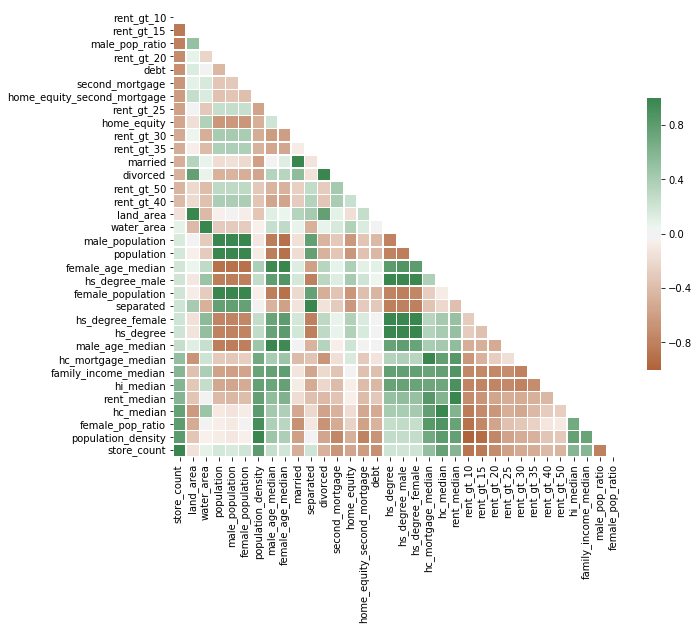

In [51]:
# Generate a mask for the upper triangle
mask = np.zeros_like(star_top_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(30, 135, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(star_top_corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

From correlation dataset and plot above, we can discover that **population density** is the primary positive demographic factor to at least 100 Starbucks store in targeted cities. Other positive features (higher than 75%) include **female population ratio and monthly owner costs (hc)**. When these features exhibit higher value, the number of Starbucks in that city can be predicted has higher popularity.

On the contrary, features such as **the empirical distribution value that an individual’s rent will be greater than 10-20% of their household income and male population ratio** becomes the negative correlation features (higher than -75%). When these features exhibit lower value, the number of Starbucks in that city can be predicted has higher popularity.

Interestingly, the zero impact features (-0.2 - 0.2%) now includes **land and water area, population (includes male and female population), percentage of male with at least high school degree, and female age**. 

### 4.4 Correlation study of Manhattan Neighborhoods
Next, let's study which feature is strongly related to number of store in neighborhood scale.

In [54]:
star_man_neigh_corr = star_man_neigh.copy()
star_man_neigh_corr.set_index('neighborhood',inplace=True)
star_man_neigh_corr = star_man_neigh_corr.astype(float)
star_man_neigh_corr = star_man_neigh_corr.corr()
star_man_neigh_corr = star_man_neigh_corr.sort_values('store_count', ascending=True)
star_man_neigh_corr.tail(10)

store_count  \
Median rent, recent movers (2018$)                               0.724777      
Units issued new certificates of occupancy                       0.731749      
421-a Tax Exemption (units)                                      0.735857      
Notices of foreclosure, repeat, 1-4 family and condo properties  0.741613      
Sales volume, all property types                                 0.802665      
Sales volume, condominium                                        0.812231      
Severely rent-burdened households, moderate income               0.814954      
Single-person households                                         0.834631      
Rental vacancy rate                                              0.862337      
store_count                                                      1.000000      

                                                                 Born in New York State  \
Median rent, recent movers (2018$)                              -0.594105                 
Units issued new certificates of occupancy                      -0.395675                 
421-a Tax Exemption (units)                                     -0.320492                 
Notices of foreclosure, repeat, 1-4 family and condo properties -0.170463                 
Sales volume, all property types                                -0.323260                 
Sales volume, condominium                                       -0.346405                 
Severely rent-burdened households, moderate income              -0.488208                 
Single-person households                                        -0.300848                 
Rental vacancy rate                                             -0.260673                 
store_count                                                     -0.497466                 

                                                                 Disabled population  \
Median rent, recent movers (2018$)                              -0.750743              
Units issued new certificates of occupancy                      -0.009637              
421-a Tax Exemption (units)                                      0.061296              
Notices of foreclosure, repeat, 1-4 family and condo properties -0.432907              
Sales volume, all property types                                -0.476087              
Sales volume, condominium                                       -0.480310              
Severely rent-burdened households, moderate income              -0.573337              
Single-person households                                        -0.323502              
Rental vacancy rate                                             -0.656596              
store_count                                                     -0.503350              

                                                                 Foreign-born population  \
Median rent, recent movers (2018$)                              -0.416649                  
Units issued new certificates of occupancy                       0.167888                  
421-a Tax Exemption (units)                                      0.016142                  
Notices of foreclosure, repeat, 1-4 family and condo properties -0.350310                  
Sales volume, all property types                                -0.418854                  
Sales volume, condominium                                       -0.405129                  
Severely rent-burdened households, moderate income              -0.467615                  
Single-person households                                        -0.336268                  
Rental vacancy rate                                             -0.554594                  
store_count                                                     -0.183097                  

                                                                 Population  \
Median rent, recent movers (2018$)                              -0.065592     
Units issued new certificates of occupancy

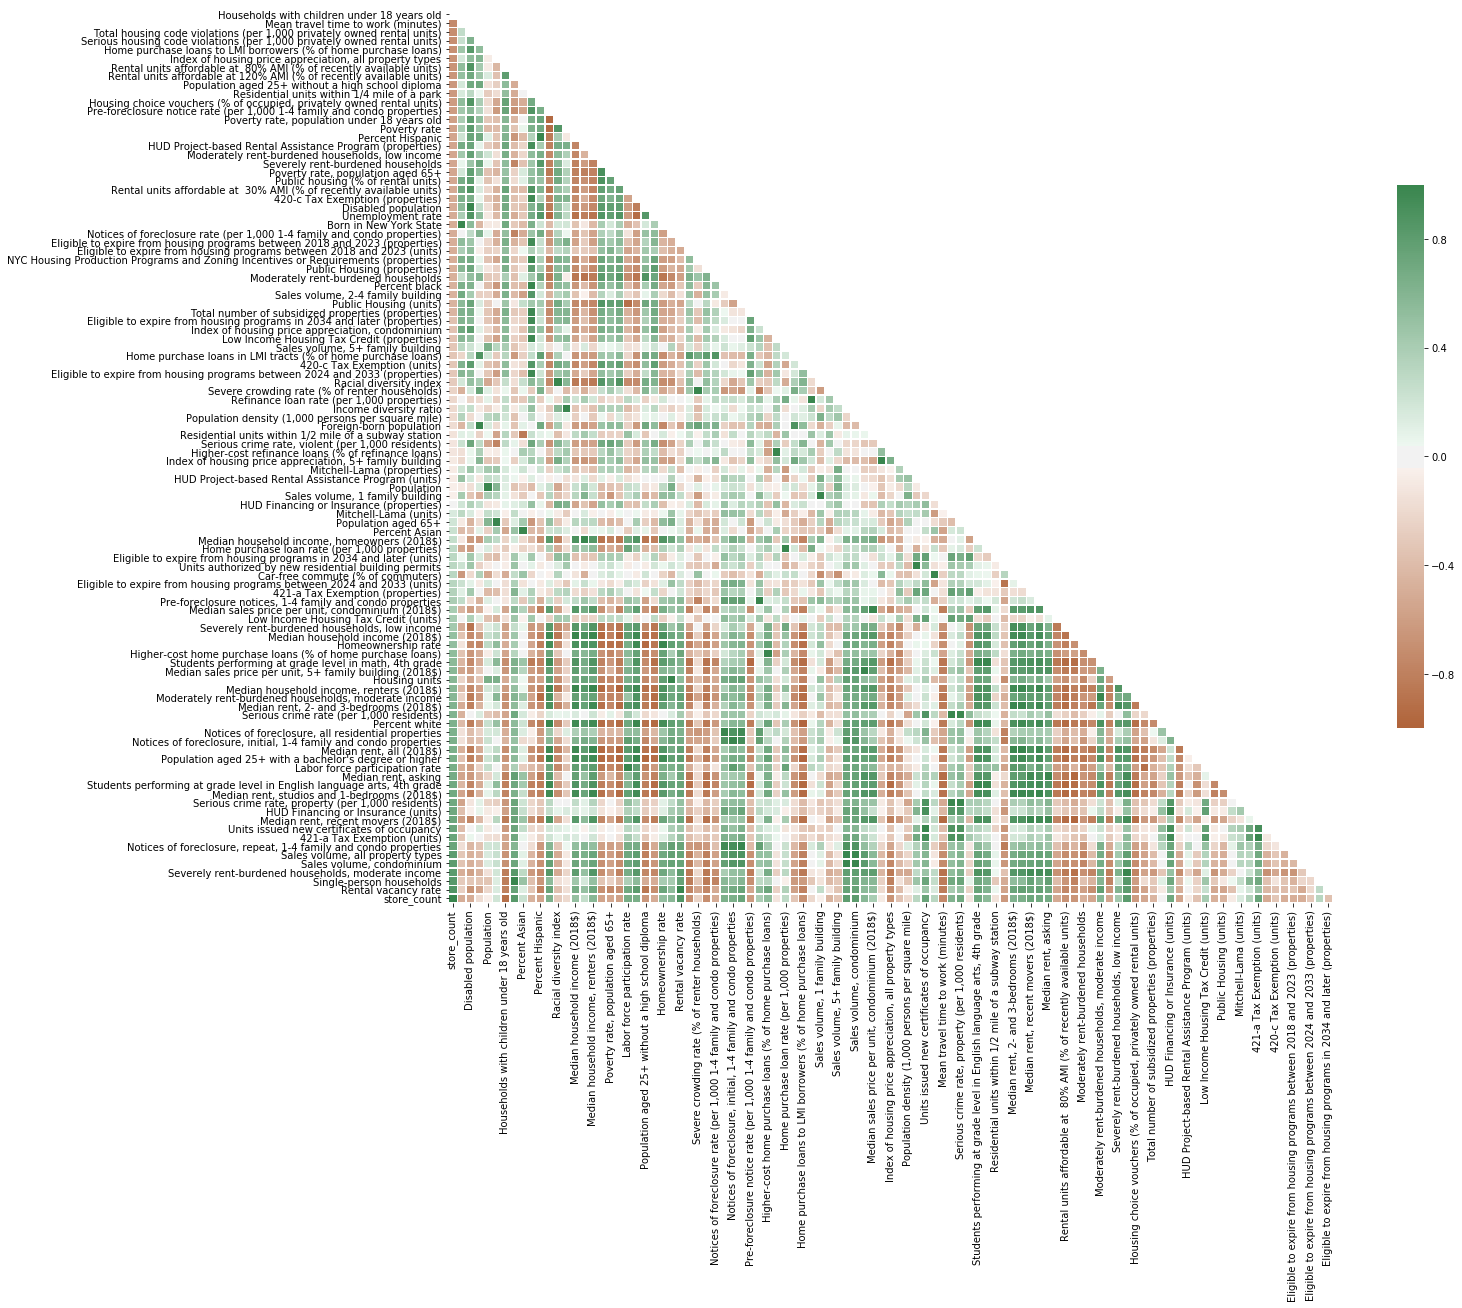

In [53]:
# Generate a mask for the upper triangle
mask = np.zeros_like(star_man_neigh_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(30, 135, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(star_man_neigh_corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

From correlation dataset and plot above, we can discover that **rental vacancy rate** is the primary positive demographic factor in Manhattan neighborhoods. Other positive features include **single-person households, severely rent-burdened households and sales volume (condominium and all property types)**. When these features exhibit higher value, the number of Starbucks in that neighbourhood can be predicted has higher popularity.

On the contrary, features such as **percentage of households with children under 18 years old** becomes the negative correlation features in this scale. When this feature exhibit lower value, the number of Starbucks in that neighbourhood can be predicted has higher number.

The least impact features now includes **income diversity ratio, population density, foreign-born population, residential units within 1/2 mile of a subway station, serious crime rate, higher-cost refinance loans, index of housing price appreciation (5+ family building), Mitchell-Lama (properties), HUD Project-based Rental Assistance Program, population, sales volume of 1 family building, HUD Financing or Insurance (properties) and Mitchell-Lama (units)**. 

### 4.5 Correlation study of Manhattan Neighborhoods (Venues)
Let's study which type of venues is strongly related to number of Starbucks in neighborhood scale.

In [59]:
star_man_neigh_venue_corr = star_man_neigh_venue.copy()
star_man_neigh_venue_corr.set_index('neighborhood',inplace=True)
star_man_neigh_venue_corr = star_man_neigh_venue_corr.astype(float)
star_man_neigh_venue_corr = star_man_neigh_venue_corr.corr()
star_man_neigh_venue_corr = star_man_neigh_venue_corr.sort_values('store_count', ascending=True)
star_man_neigh_venue_corr.head(100)
star_man_neigh_venue_corr.to_csv(r'C:\Users\ASUS\Downloads\star_man_neigh_venue_corr.csv', index=True)

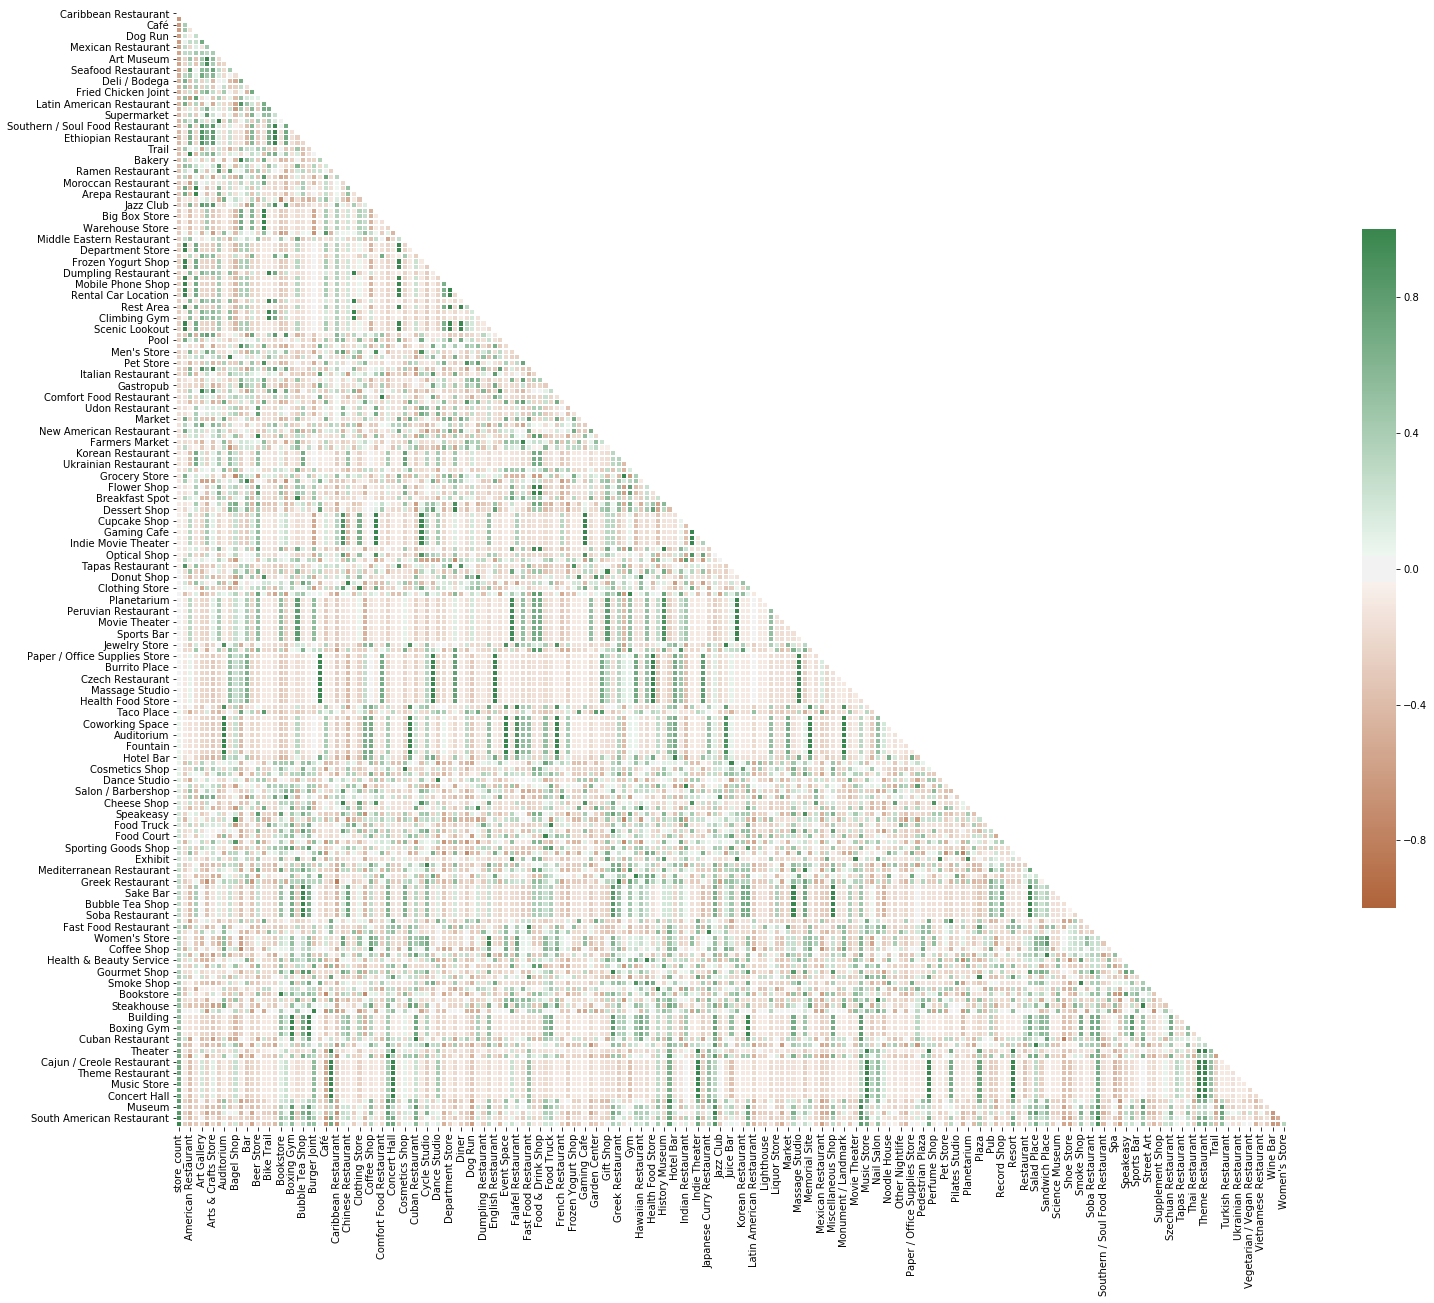

In [57]:
# Generate a mask for the upper triangle
mask = np.zeros_like(star_man_neigh_venue_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(30, 135, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(star_man_neigh_venue_corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

From correlation dataset and plot above, we can discover that the number of **south american restaurant** is related the most to Starbucks store in Manhattan neighborhoods. Other positive features include **japanese restaurant, museum, hotel and other art and music performing space**. When these features exhibit higher value, the number of Starbucks in that neighbourhood can be predicted has higher popularity.

Only one venue could be merely viewed as negative correlation this time, **Caribbean restaurant**. Moreover, the least impact venue categories (only list range within -0.05 to 0.05%) includes **Gift Shop, Donut Shop, Chinese Restaurant, Clothing Store, Gym, Planetarium, Science Museum, Peruvian Restaurant, Used Bookstore, Movie Theater, Souvenir Shop, Sports Bar, Kids Store, Jewelry Store, Vegetarian Restaurant, Stationery Supplies Store, Pilates Studio, Burrito Place, Noodle House, Czech Restaurant, Turkish Restaurant, Massage Studio, English Restaurant, Health Food Store and Falafel Restaurant**. 

### 4.6 Clustering study of Manhattan Neighborhoods (Venues)
Study the cluster pattern among these Mnahattan Neighborhoods via venue categories that around Starbucks.

In [60]:
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5
manhattan_grouped_clustering = manhattan_grouped.drop('neighborhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 0, 3, 3, 2, 0, 4, 2, 4])

In [61]:
# add clustering labels
manhattan_merged = star_man_neigh_group_geo.copy()
man_neigh_venues_sorted2 = man_neigh_venues_sorted.copy()
man_neigh_venues_sorted2.insert(0, 'Cluster Labels', kmeans.labels_)
man_neigh_venues_sorted2
# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(man_neigh_venues_sorted2.set_index('neighborhood'), on='neighborhood')
manhattan_merged.head() 

neighborhood       long        lat  Cluster Labels  \
0  central harlem              -73.950000  40.810000  2                
1  chelsea & clinton & midtown -73.988088  40.755441  1                
2  east harlem                 -73.940000  40.795000  0                
3  financial district          -74.010385  40.707692  3                
4  gramercy park & murray hill -73.977500  40.751429  3                

  1st Most Common Venue 2nd Most Common Venue  \
0  Jazz Club             French Restaurant      
1  Theater               Hotel                  
2  Mexican Restaurant    Bakery                 
3  Coffee Shop           Hotel                  
4  Coffee Shop           Japanese Restaurant    

             3rd Most Common Venue      4th Most Common Venue  \
0  Southern / Soul Food Restaurant  Wine Shop                   
1  Yoga Studio                      Japanese Restaurant         
2  Pizza Place                      Latin American Restaurant   
3  Pizza Place                      Café                        
4  Park                             Hotel                       

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0  Seafood Restaurant    Coffee Shop           Italian Restaurant     
1  Coffee Shop           Sushi Restaurant      Bakery                 
2  Café                  Thai Restaurant       Deli / Bodega          
3  Steakhouse            Wine Shop             Sandwich Place         
4  Gym / Fitness Center  Grocery Store         Chinese Restaurant     

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0  Park                  American Restaurant   Theater                
1  Pizza Place           Plaza                 Burger Joint           
2  Park                  Italian Restaurant    Spa                    
3  Cocktail Bar          Park                  Gym                    
4  Steakhouse            Sandwich Place        Gym

In [62]:
# create map
m5 = folium.Map(
    location=[40.775, -73.975],
    tiles='cartodbpositron',
    zoom_start=12,
    width=500,
    height=800,
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['lat'], manhattan_merged['long'], manhattan_merged['neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(m5)
       
m5

In [63]:
# After examining k from 3 to 6, at last choose 5 instead, 
# since bigger than 5 will cause clusters to be hardly differentiated from each other.

# 'cluster 0' of 5 clusteres
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0]

neighborhood       long        lat  Cluster Labels  \
2  east harlem                 -73.940000  40.795000  0                
6  inwood & washington heights -73.936667  40.853333  0                

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
2  Mexican Restaurant    Bakery                Pizza Place            
6  Pizza Place           Bakery                Grocery Store          

       4th Most Common Venue 5th Most Common Venue      6th Most Common Venue  \
2  Latin American Restaurant  Café                  Thai Restaurant             
6  Café                       Park                  Latin American Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
2  Deli / Bodega         Park                  Italian Restaurant     
6  Mexican Restaurant    Bar                   Deli / Bodega          

  10th Most Common Venue  
2  Spa                    
6  Tapas Restaurant

In [64]:
# 'cluster 1' of 5 clusteres
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1]

neighborhood       long        lat  Cluster Labels  \
1  chelsea & clinton & midtown -73.988088  40.755441  1                

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
1  Theater               Hotel                 Yoga Studio            

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
1  Japanese Restaurant   Coffee Shop           Sushi Restaurant       

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
1  Bakery                Pizza Place           Plaza                  

  10th Most Common Venue  
1  Burger Joint

In [65]:
# 'cluster 2' of 5 clusteres
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2]

neighborhood       long        lat  Cluster Labels  \
0  central harlem                 -73.950000  40.810000  2                
5  greenwich village & soho       -74.002500  40.726250  2                
8  morningside & hamilton heights -73.953333  40.813333  2                

  1st Most Common Venue 2nd Most Common Venue  \
0  Jazz Club             French Restaurant      
5  Italian Restaurant    Seafood Restaurant     
8  Seafood Restaurant    Coffee Shop            

             3rd Most Common Venue 4th Most Common Venue  \
0  Southern / Soul Food Restaurant  Wine Shop              
5  Coffee Shop                      Pizza Place            
8  Italian Restaurant               Wine Shop              

  5th Most Common Venue            6th Most Common Venue  \
0  Seafood Restaurant    Coffee Shop                       
5  American Restaurant   Indie Movie Theater               
8  American Restaurant   Southern / Soul Food Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0  Italian Restaurant    Park                  American Restaurant    
5  Clothing Store        Men's Store           French Restaurant      
8  Park                  French Restaurant     Café                   

  10th Most Common Venue  
0  Theater                
5  Café                   
8  Jazz Club

In [66]:
# 'cluster 3' of 5 clusteres
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3]

neighborhood       long        lat  Cluster Labels  \
3  financial district          -74.010385  40.707692  3                
4  gramercy park & murray hill -73.977500  40.751429  3                

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
3  Coffee Shop           Hotel                 Pizza Place            
4  Coffee Shop           Japanese Restaurant   Park                   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
3  Café                  Steakhouse            Wine Shop              
4  Hotel                 Gym / Fitness Center  Grocery Store          

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
3  Sandwich Place        Cocktail Bar          Park                   
4  Chinese Restaurant    Steakhouse            Sandwich Place         

  10th Most Common Venue  
3  Gym                    
4  Gym

In [67]:
# 'cluster 4' of 5 clusteres
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4]

neighborhood       long        lat  Cluster Labels  \
7   lower east side -73.988333  40.730833  4                
9   upper east side -73.956522  40.773043  4                
10  upper west side -73.975238  40.785238  4                

   1st Most Common Venue          2nd Most Common Venue 3rd Most Common Venue  \
7   Ice Cream Shop        Vegetarian / Vegan Restaurant  Coffee Shop            
9   Italian Restaurant    Gym / Fitness Center           Bakery                 
10  Park                  Yoga Studio                    Coffee Shop            

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
7   Yoga Studio           Wine Shop             Gym                    
9   Bar                   Sushi Restaurant      Thai Restaurant        
10  Exhibit               Sushi Restaurant      Italian Restaurant     

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
7   Seafood Restaurant    Cosmetics Shop        Pizza Place            
9   Ice Cream Shop        Coffee Shop           Mexican Restaurant     
10  Bar                   Bakery                Gym                    

   10th Most Common Venue  
7   Chinese Restaurant     
9   Dessert Shop           
10  Planetarium

The common venue categories in each neighborhoods cluster at some point will also reveal the characteristics of neighborhoods.

---
## 5_Result_&_Discussion

### 5.1 Pattern in city level
In 2017, Starbucks has 13608 franchises in US, in which also includes Coffee House Holdings, Evolution Fresh and Teavana. There are 3567 US cities (places) that has at least one Starbucks in that time. Among these places, **New York's Manhattan** itself has the highest number of Starbucks: 233 stores. Manhattan is the fondest place of Starbucks in East Coast, but others top city candidates mainly distribute along West Coast.

#### 5.1.1 Starbucks pattern in all city candidates in terms of demographic and economic
Due to the data limitation, we only investigate the pattern of Starbucks stores among 2960 places (around 5.4% data does not match with Starbucks stores data). In city level of analysis conducted by correlation, it first discovers that **population** (includes male, female and entire population) is the primary positive factor, means higher population to some extent will influence number of Starbucks in one place. However remaining features exhibit vague relationship with store number, next we target on cities has higher popularity of store. 

#### 5.1.2 Starbucks pattern in top 9 city candidates in terms of demographic and economic
City candidates has high popularity of Starbucks is narrowed down to 9 by investigating Nakamoto Coefficient, there are Manhattan (NY), Chicago (IL), Las Vegas (NV), Seattle (WA), Houston (TX), San Diego (CA), Los Angeles (CA), Portland (OR) and Phoenix (AZ). These cities all have at least 100 Starbucks stores. From correlation study we can discover that **population density** is the most crucial feature this time. Higher population per land area, higher possibility of Starbucks density. Other positive features also include **female population ratio and monthly owner costs**. Interestingly, female population is the second positive impact on Starbucks store. Although it is hard to say which influence the other first, direct or indirect, Starbucks's business decision maker could think about business promotion targeted on this specific population. For the later features it could be easily understood, higher residents' cost and income at some points depicts higher expenses ability and commercial activity, so stores' number will be higher around that area. 

On the contrary, features such as **the empirical distribution value that an individual’s rent will be greater than 10-20% of their household income and male population ratio** becomes the negative correlation features. When these features exhibit lower value, the number of Starbucks in that city can be predicted has higher popularity. 

The zero impact features are **land and water area, population (includes male and female population), percentage of male with at least high school degree, and female age**. 

### 5.2 Pattern in neighborhood level
From city level data, we found Manhattan is the highest popularity of Starbucks place, so it is chosen to conduct pattern analysis in neighborhood level. Since majority census data normally recorded in terms of 'place' (does not includes neighborhood level), neighborhood is identify according to postcode of stores, in which result in 11 groups of neighborhood: 1) East Harlem; 2) Central Harlem; 3) Inwood and Washington Heights; 4) Morningside and Hamilton Heights; 5) Lower East Side; 6) Greenwich Village and Soho; 7) Upper West Side; 8) Upper East Side; 9) Financial District; 10) Gramercy Park and Murray Hill; 11) Chelsea, Clinton and Midtown. The last group has the highest number of Starbucks store (68). 

#### 5.2.1 Starbucks pattern in Manhattan neighborhoods in terms of demographic, housing market, neighborhood service and renters
From correlation conducted among these 11 groups of neighborhoods, we discover that **rental vacancy rate** is the primary positive demographic factor in Manhattan neighborhoods. Rental vacancy rates measure the percentage of rental homes that are empty and available for rent out of all the rental stock in an area. Although high vacancy rate means tenants are in a more favorable position, but for this case it might be resulted by high rental price, in which indicates higher housing price of one area will result more Starbucks store. Other positive features include **single-person households, severely rent-burdened households and sales volume (condominium and all property types)**. So, we could also say number of Starbucks in Manhattan could has positive relationship with the number of residents who remains single and spends more on rental. Higher transactions of all residential properties also result in higher number of Starbucks in Manhattan neighborhoods.

On the contrary, features such as **households with children under 18 years old** becomes the negative correlation features in this scale. The percentage of households living with children under 18 also could indicate the birth rate. So lower birth rate or less teenage in one area might result in higher Starbucks store number.

The least impact features includes **income diversity ratio, population and population density, foreign-born population, accessibility of residential units within 1/2 mile of a subway station, serious crime rate, higher-cost refinance loans, the average price changes in repeated sales of the same 5+ family properties, number of properties and units receiving a benefit from the Mitchell-Lama program[1], number of units in properties receiving benefit from HUD Project-based Rental Assistance Program[2], sales volume of 1 family building and number of properties receiving benefit from a HUD Financing or Insurance Program[2]**. 

#### 5.2.2 Starbucks pattern in Manhattan neighborhoods in terms of venues composition
From correlation study of Starbucks store number and nearby venue categories' number, we can discover that the number of **South American Restaurant** is related the most to Starbucks store in Manhattan neighborhoods. Other positive features include **Japanese Restaurant, Museum, Hotel and other art and music performing space**. 

Only one venue could be merely viewed as negative correlation this time, **Caribbean restaurant**. Moreover, the least impact venue categories (only list range within -0.05 to 0.05%) includes **Gift Shop, Donut Shop, Chinese Restaurant, Clothing Store, Gym, Planetarium, Science Museum, Peruvian Restaurant, Used Bookstore, Movie Theater, Souvenir Shop, Sports Bar, Kids Store, Jewelry Store, Vegetarian Restaurant, Stationery Supplies Store, Pilates Studio, Burrito Place, Noodle House, Czech Restaurant, Turkish Restaurant, Massage Studio, English Restaurant, Health Food Store and Falafel Restaurant**. 

#### 5.2.3 Clustering Manhattan neighborhoods in terms of venues composition
The common venue categories in each neighborhoods cluster at some point will also reveal the characteristics of neighborhoods.

- Cluster 0 includes **East Harlem, Inwood & Washington Heights**. In these neighborhoods, Starbucks store's nearby common venue categories includes **Pizza Place, Bakery, Cafe, Latin American and Mexican Restaurant**.

- Cluster 1 includes **Chelsea, Clinton & Midtown**. In these neighborhoods, Starbucks store's nearby common venue categories includes **Theater, Hotel, Yoga, Japanese Restaurant and Coffee Shops too**.

- Cluster 2 includes **Central Harlem, Greenwich, Soho, Morningside & Hamilton Heights**. In these neighborhoods, Starbucks store's nearby common venue categories includes **Coffee Shop, Italian, French, American and Seafood Restaurant**.

- Cluster 3 includes **Financial District, Gramercy Park & Murray Hill**. In these neighborhoods, Starbucks store's nearby common venue categories includes **Coffee Shop, Hotel, Steakhouse, Sandwich place, Park and Gym**.

- Lastly, Cluster 4 includes **Lower East, Upper East & Upper West**. In these neighborhoods, Starbucks store's nearby common venue categories includes **Coffee Shop, Gym and high diversity of restaurant**.


*[1] The Mitchell-Lama Housing Program is a non-subsidy governmental housing guarantee in the state of New York. It was sponsored by New York State Senator MacNeil Mitchell and Assemblyman Alfred Lama. The program's publicly stated purpose was the development and building of affordable housing, both rental and co-operatively owned, for middle-income residents. https://en.wikipedia.org/wiki/Mitchell-Lama_Housing_Program<br>*
*[2] Project-based rental assistance provides critical affordable housing stock to low-income families across the country. This type of rental assistance allows tenants to live in an affordable unit and pay rent based upon their income. https://www.nhlp.org/resource-center/project-based-rental-assistance/*

---
## 6_Conclusion
The aim of this study is to discover the pattern of Starbucks in city and neighborhood level by studying the correlation of the number of Starbucks store and relevant demographic, economic and venues data. Clustering of venues was then performed in order to discover cluster of neighborhoods according to number of venues categories number. 

In city level, relevant fast-food entrepreneurs could target city / place by the pattern discovered, such as the stated positive and negative correlation factors above of one city. In neighborhood level, stakeholder could target firstly on neighborhood clusters according to venues categories. Next, they could focus on specific neighborhood based on correlation factors in terms of demographic, housing market, neighborhood service and renters.